Loading the `xlsx` formatted data (which was clubbed together by the earlier version of gui based python code with subject details) and then saving them into csv formats

In [2]:
import pandas as pd

xlsx_files = ("generated_before.xlsx", "generated_during.xlsx", "generated_after.xlsx")
csv_files = ("before.csv", "during.csv", "after.csv")

for i in range(len(xlsx_files)): 
    df = pd.read_excel("data/" + xlsx_files[i])
    df.to_csv("data/" + csv_files[i], index=False)
    
print("Saved as csv formats!")

before_df = pd.read_csv('data/before.csv')
during_df = pd.read_csv('data/during.csv')
after_df = pd.read_csv('data/after.csv')

Saved as csv formats!


Splitting the data of each and every `subject` according to incremental values of `Sl No` column

In [3]:
def split_dataframe_by_increment(df, column_name = "Sl No"):
    split_indices = [0] 
    sl_no_values = df[column_name].fillna(method='ffill').values  # Fill NaN values
    for i in range(1, len(sl_no_values)):
        if sl_no_values[i] > sl_no_values[i - 1]:
            split_indices.append(i)
    split_indices.append(len(df)) 
    
    return [df.iloc[split_indices[j]:split_indices[j+1]] for j in range(len(split_indices) - 1)]

before_chant_subject_dfs = split_dataframe_by_increment(before_df)
during_chant_subject_dfs = split_dataframe_by_increment(during_df)
after_chant_subject_dfs = split_dataframe_by_increment(after_df)

print(len(before_chant_subject_dfs))

before_chant_subject_dfs[0].head()

16


,Sl No,Subject ID,Name,Age,Gender,PhoneNumber,Email,Occupation,HKM Mantra Chanting streak (in years),Session start time,...,Baseline Relaxation index,Relaxation index,Theta peak frequency,Alpha peak frequency,Beta peak frequency,Chill,Stress,Focus,Anger,Self-control
0,1.0,1_RajeshPanda_46_M,Rajesh Panda,46.0,Male,9.849274e+09,rajeshpanda123@gmail.com,Founder: Fintech Startup,2.5,14:24:53,...,0.0,0.0,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,4.56283,7.158896,15.327831,NaN,NaN,NaN,NaN,NaN


In [18]:
import matplotlib.pyplot as plt

parameters_to_plot = [
    "IAPF", "Baseline Fatigue score", "Fatigue score", "Baseline Alpha Gravity", 
    "Alpha Gravity", "Baseline Concentration index", "Concentration index", 
    "Baseline Relaxation index", "Relaxation index", "Theta peak frequency", 
    "Alpha peak frequency", "Beta peak frequency", "Chill", "Stress", 
    "Focus", "Anger", "Self-control"
]

There are two plans to analyse the data as dicussed:
1. Analyse each subject's particular `parameter of interest` one by one, for this use the below written function: `plot_subjects_vs_parameter(..)`
2. Analyse all subject's `before`, `during` and `after` data all at once using a `triple bar plot`

The below cell does helps implement the first point above.

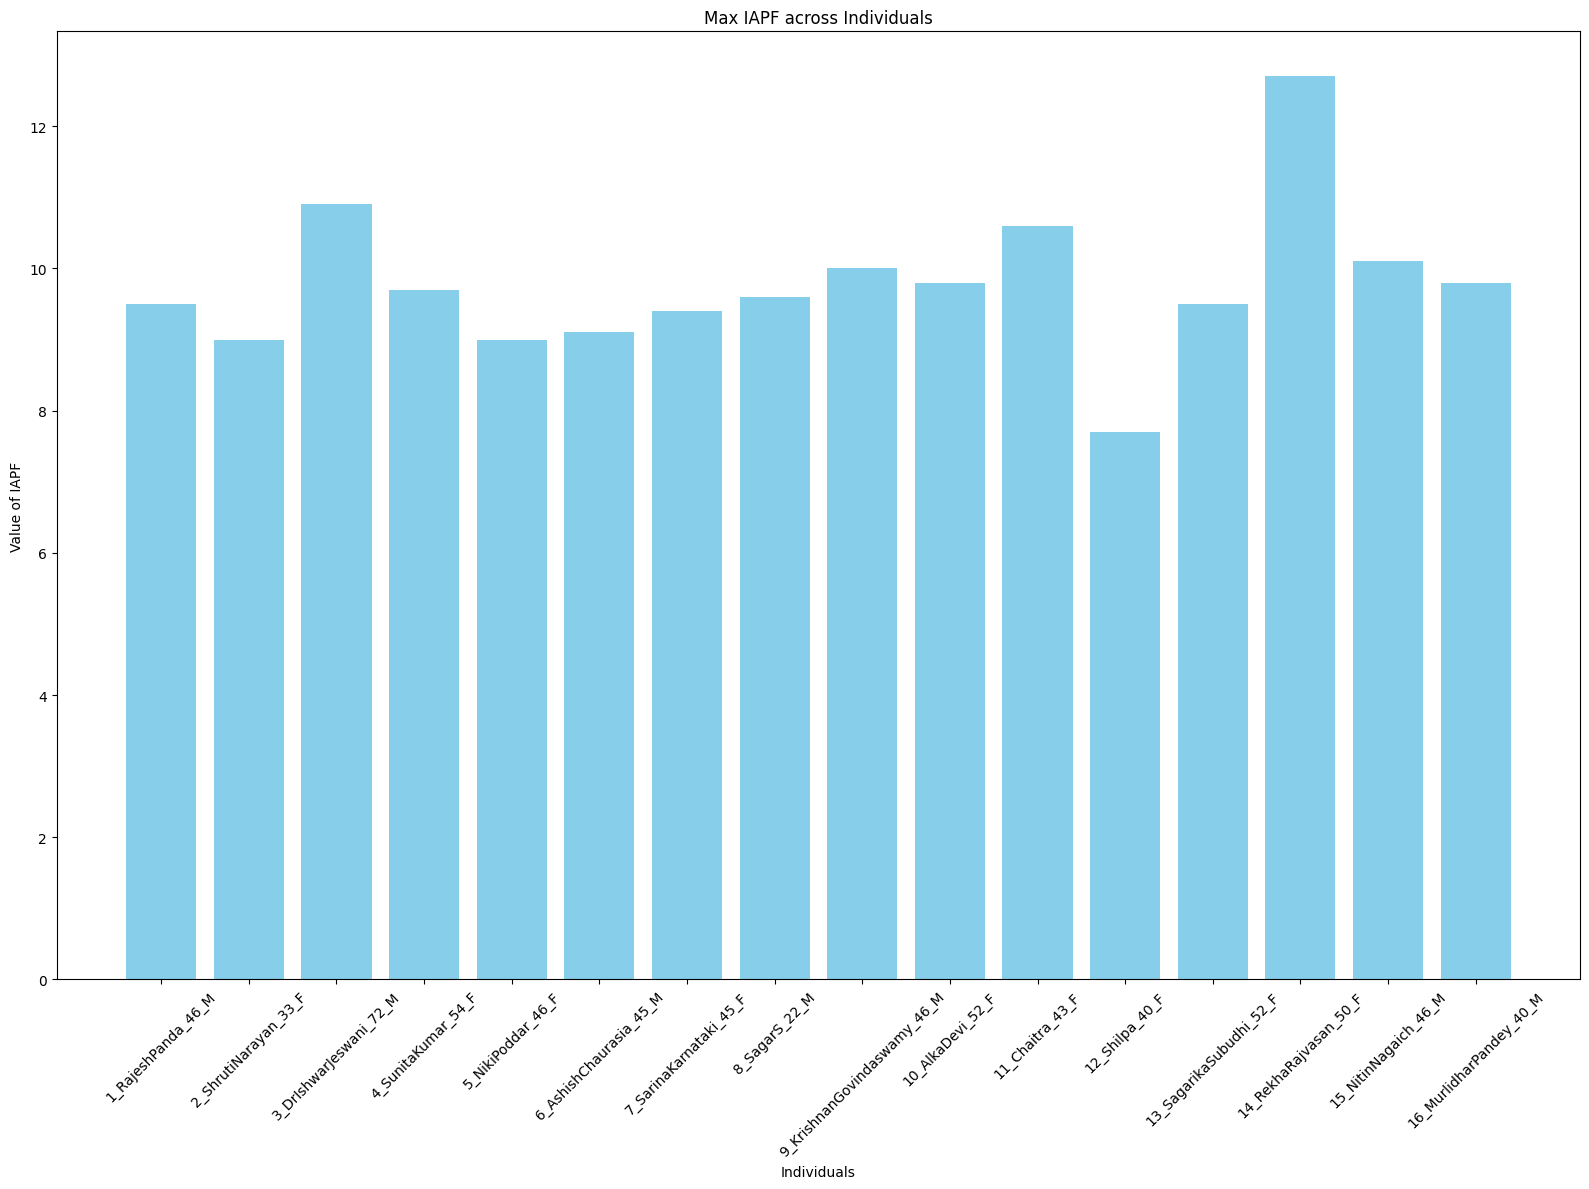

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_subjects_vs_parameter(chant_type_df=before_chant_subject_dfs, parameter_name = "IAPF"):
    individuals = []
    parameter_values = []
    
    for idx, df in enumerate(chant_type_df):
        # Assuming the individual's name or ID is in the first row of each DataFrame under a specific column
        individual_id = df.iloc[0]['Subject ID']
        individuals.append(individual_id)
        
        # Assuming the parameter value is also in the first row of each DataFrame
        parameter_value = df[parameter_name].max() 
        parameter_values.append(parameter_value)

    # Create the bar plot
    plt.figure(figsize=(16, 12))
    plt.bar(individuals, parameter_values, color='skyblue')
    plt.xlabel('Individuals')
    plt.ylabel(f"Value of {parameter_name}")
    plt.title(f'Max {parameter_name} across Individuals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_subjects_vs_parameter(before_chant_subject_dfs, parameter_name="IAPF")


This following cell helps implement the second point:

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

plot_files = []
html_content = ""

def plot_subjects_vs_parameter(before_chant_subject_dfs, during_chant_subject_dfs, after_chant_subject_dfs, parameter_name="IAPF", description=""):
    individuals = []
    before_values = []
    during_values = []
    after_values = []

    for idx, df in enumerate(before_chant_subject_dfs):
        individual_id = df.iloc[0]['Subject ID']
        individuals.append(individual_id)
        before_values.append(df[parameter_name].max())

    for idx, df in enumerate(during_chant_subject_dfs):
        during_values.append(df[parameter_name].max())

    for idx, df in enumerate(after_chant_subject_dfs):
        after_values.append(df[parameter_name].max())

    x = np.arange(len(individuals))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(16, 12))

    rects1 = ax.bar(x - width, before_values, width, label='Before Chant', color='skyblue')
    rects2 = ax.bar(x, during_values, width, label='During Chant', color='lightgreen')
    rects3 = ax.bar(x + width, after_values, width, label='After Chant', color='lightcoral')

    ax.set_xlabel('Individuals')
    ax.set_ylabel(f'Value of {parameter_name}')
    ax.set_title(f'Max {parameter_name} across Individuals')
    
    ax.set_xticks(x)
    ax.set_xticklabels(individuals, rotation=45)
    ax.legend()
    
    ax.text(0.5, 1.1, description, transform=ax.transAxes, ha='center')

    plt.tight_layout()
    plt.show()
    
    return fig
    

Along with each plot, the following code helps with `descriptive` statistics for each of the parameter.
Then saves all the plots to a `plots.pdf` file

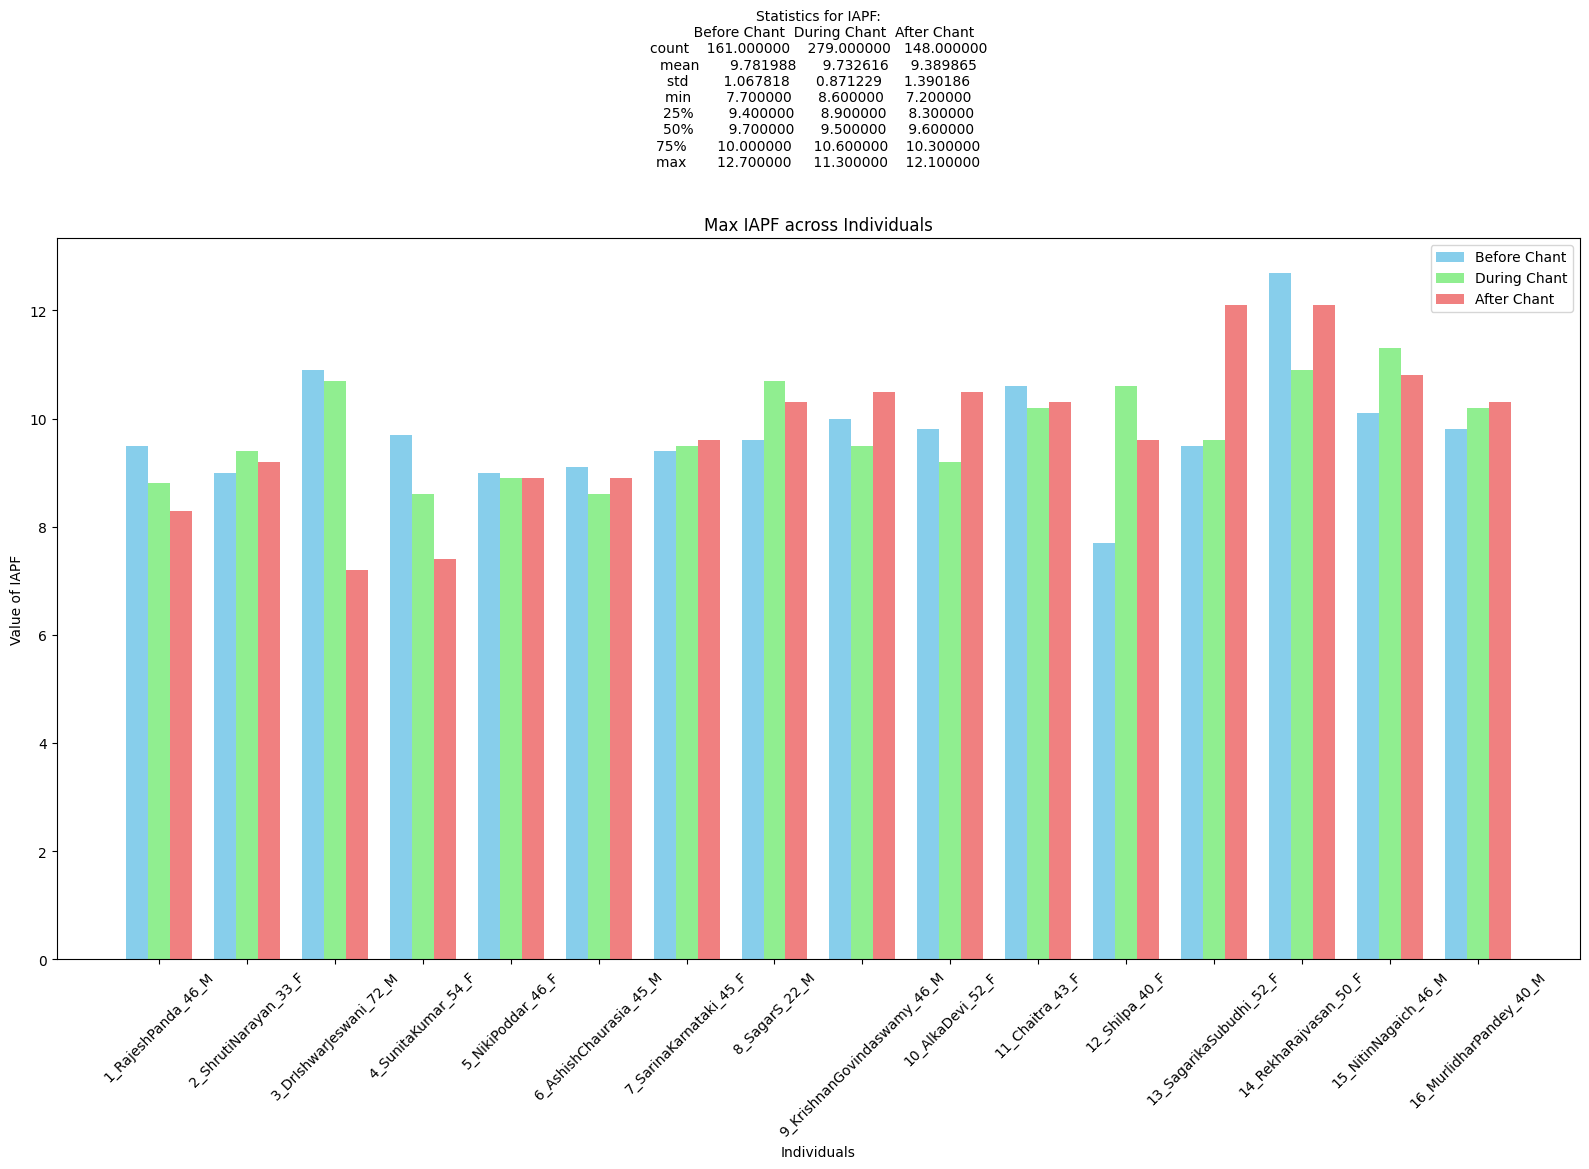

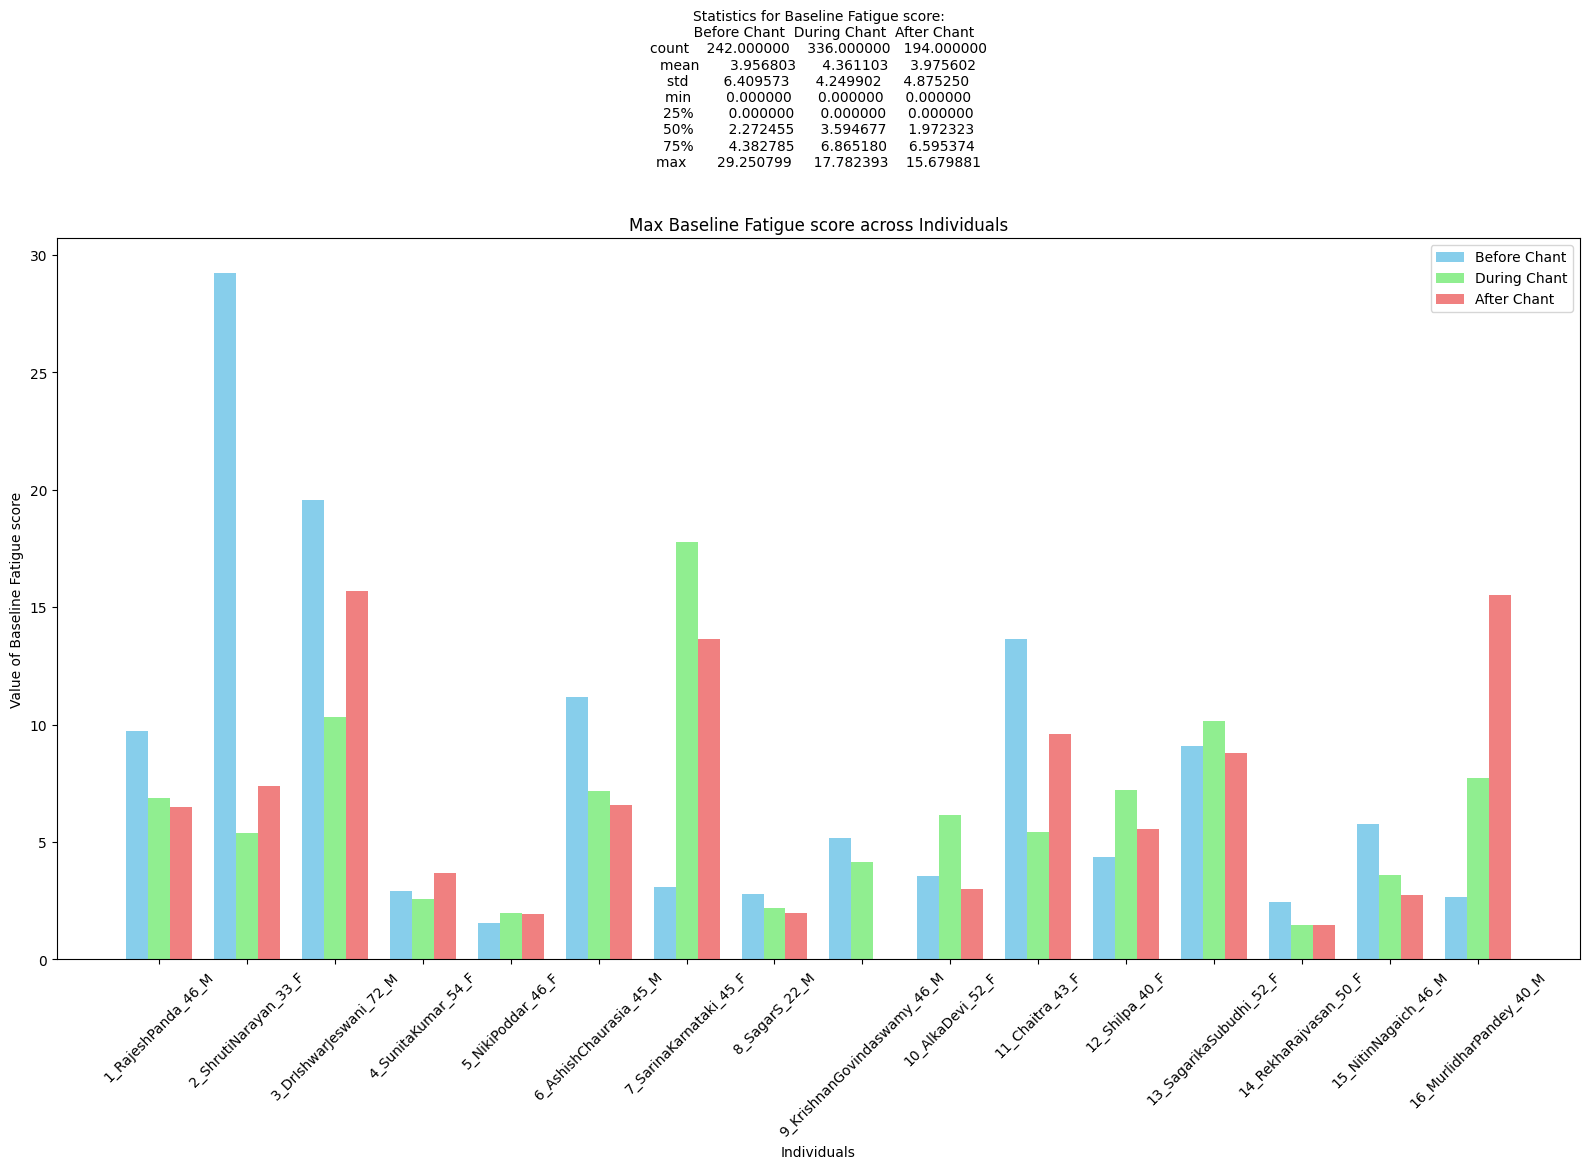

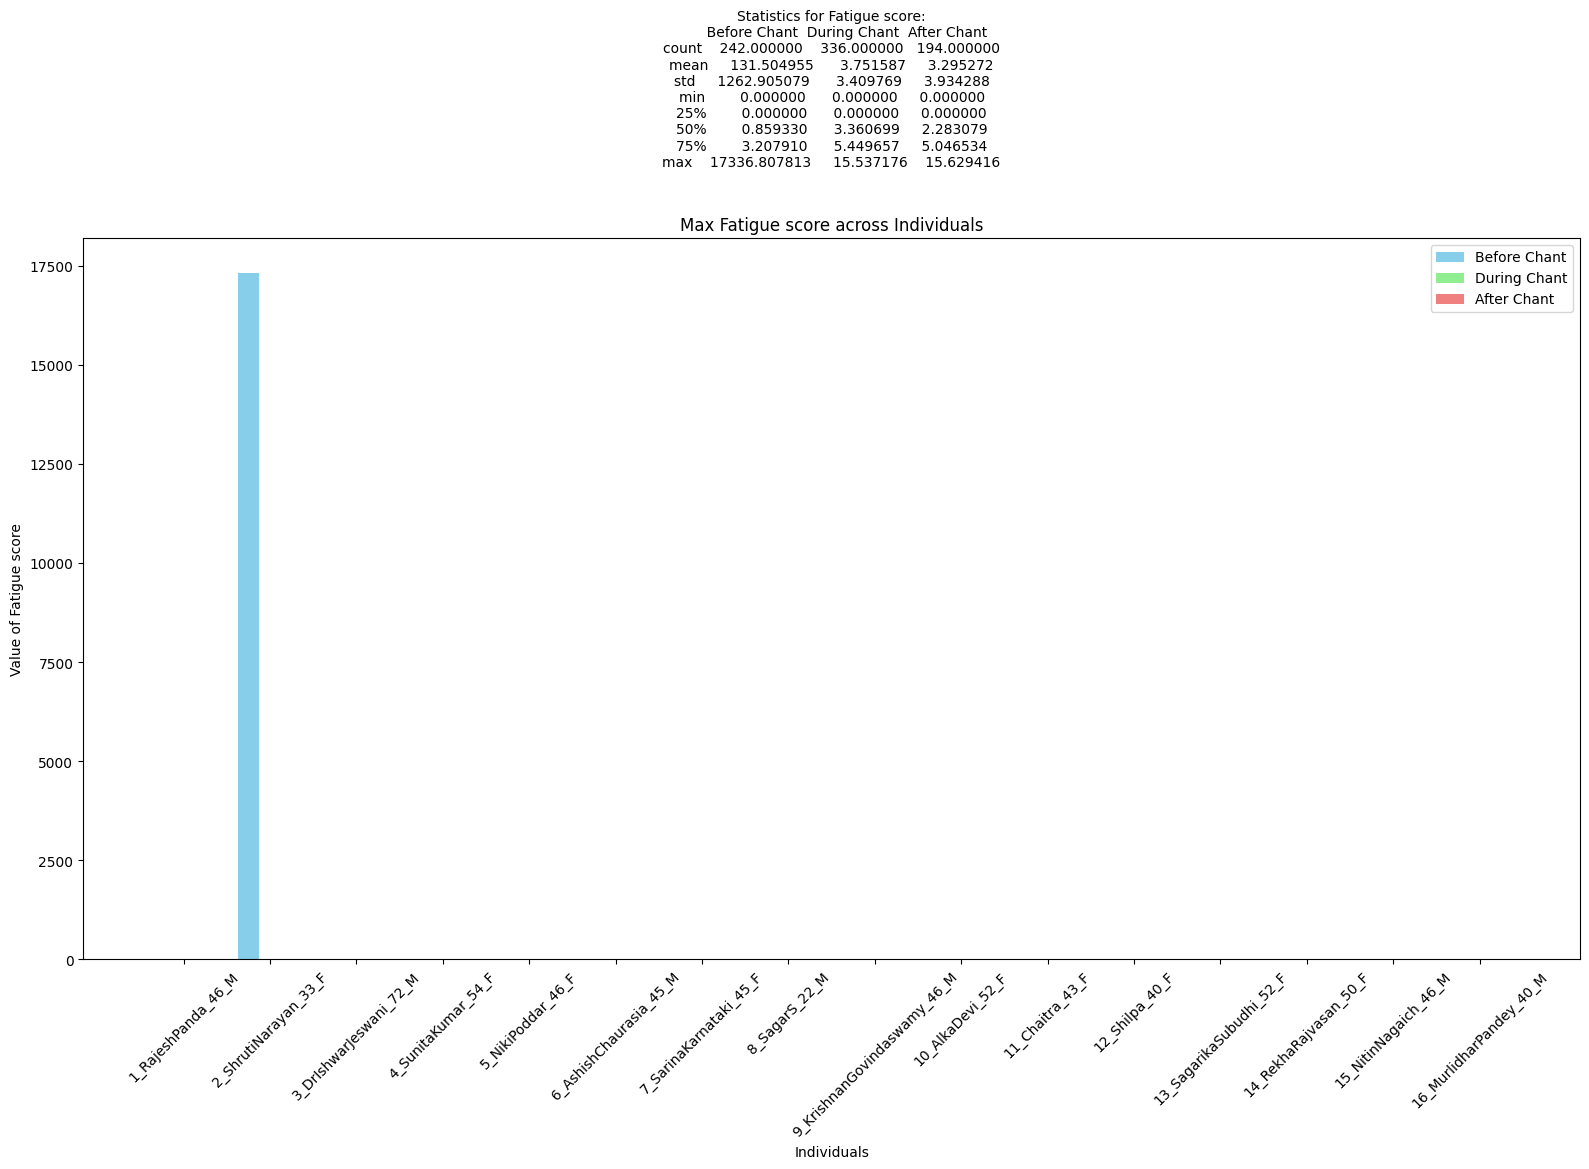

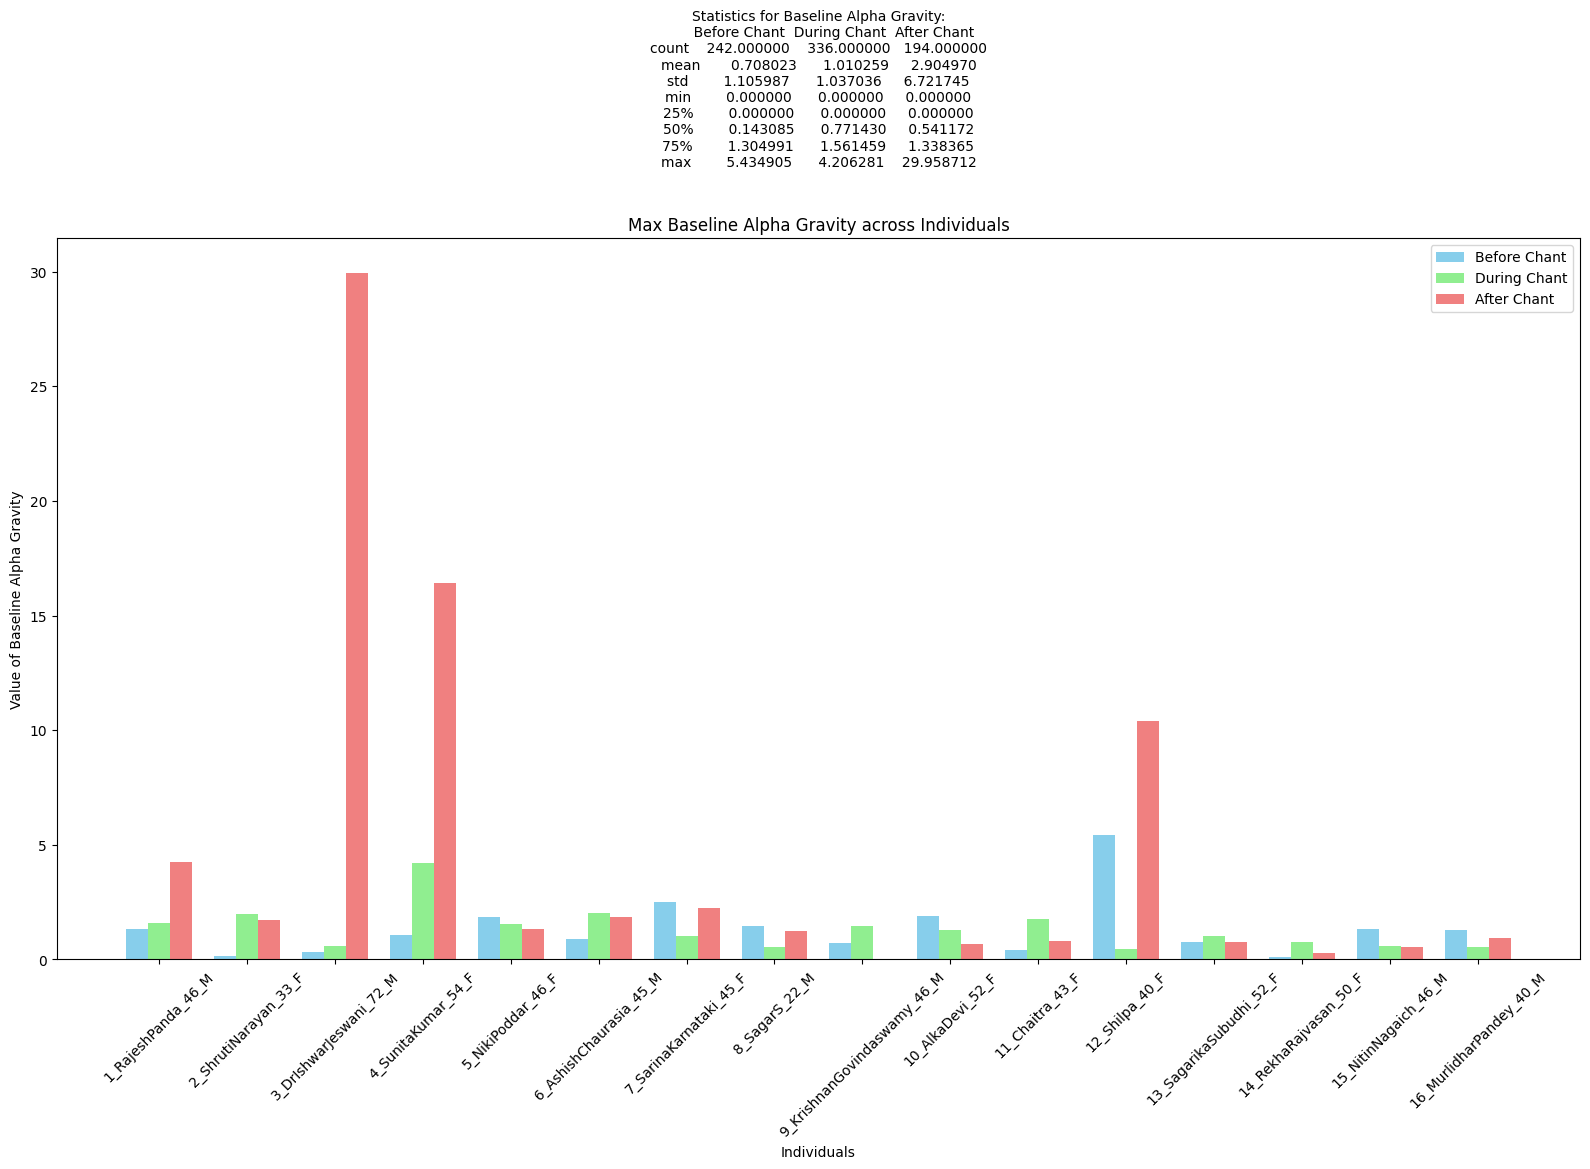

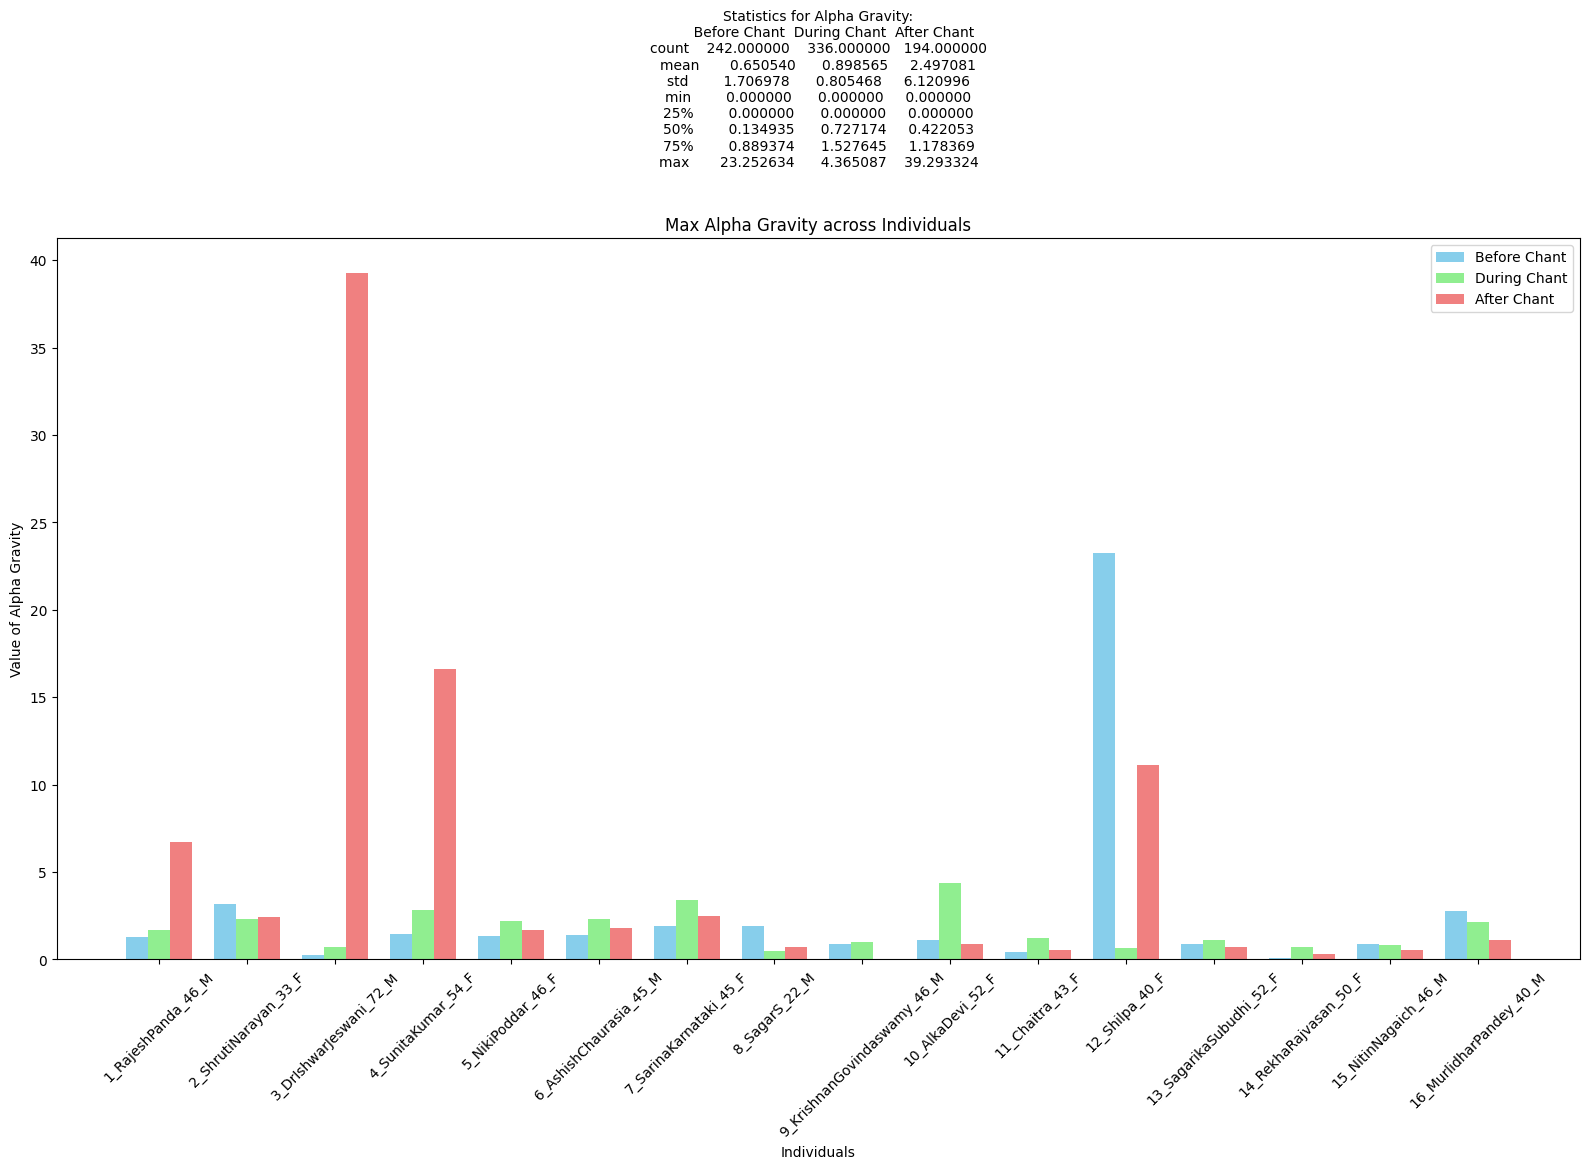

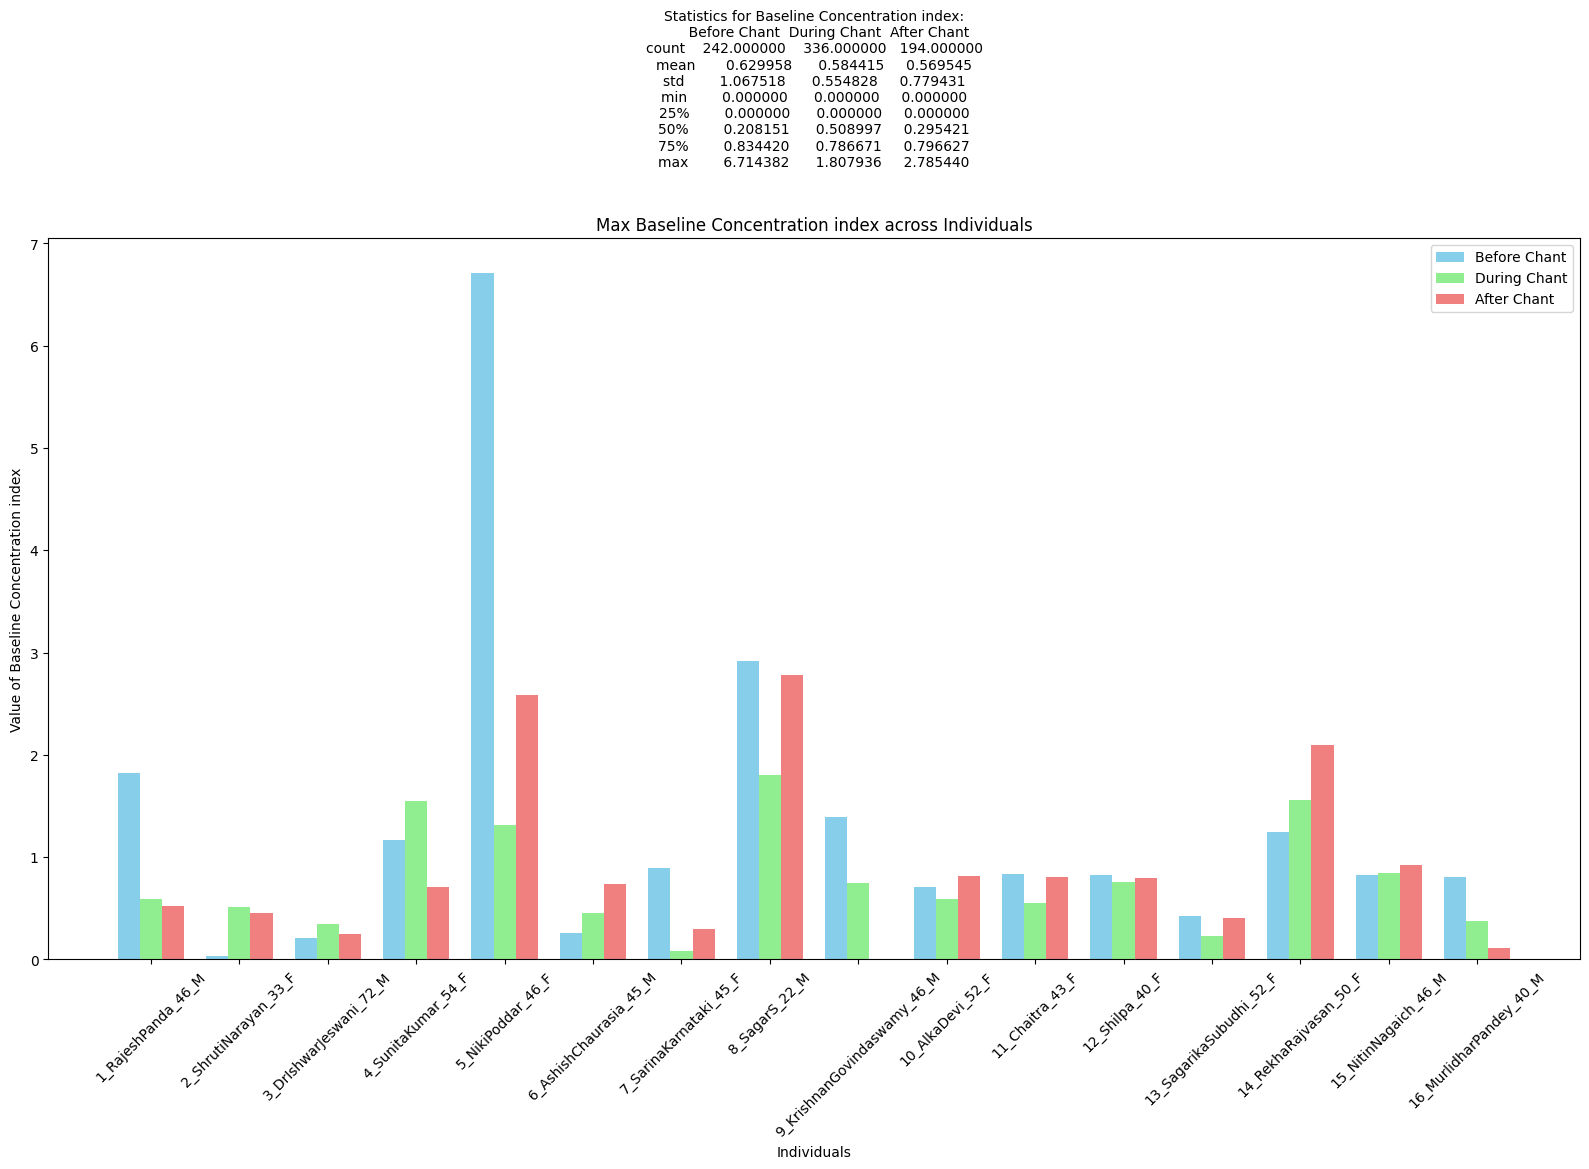

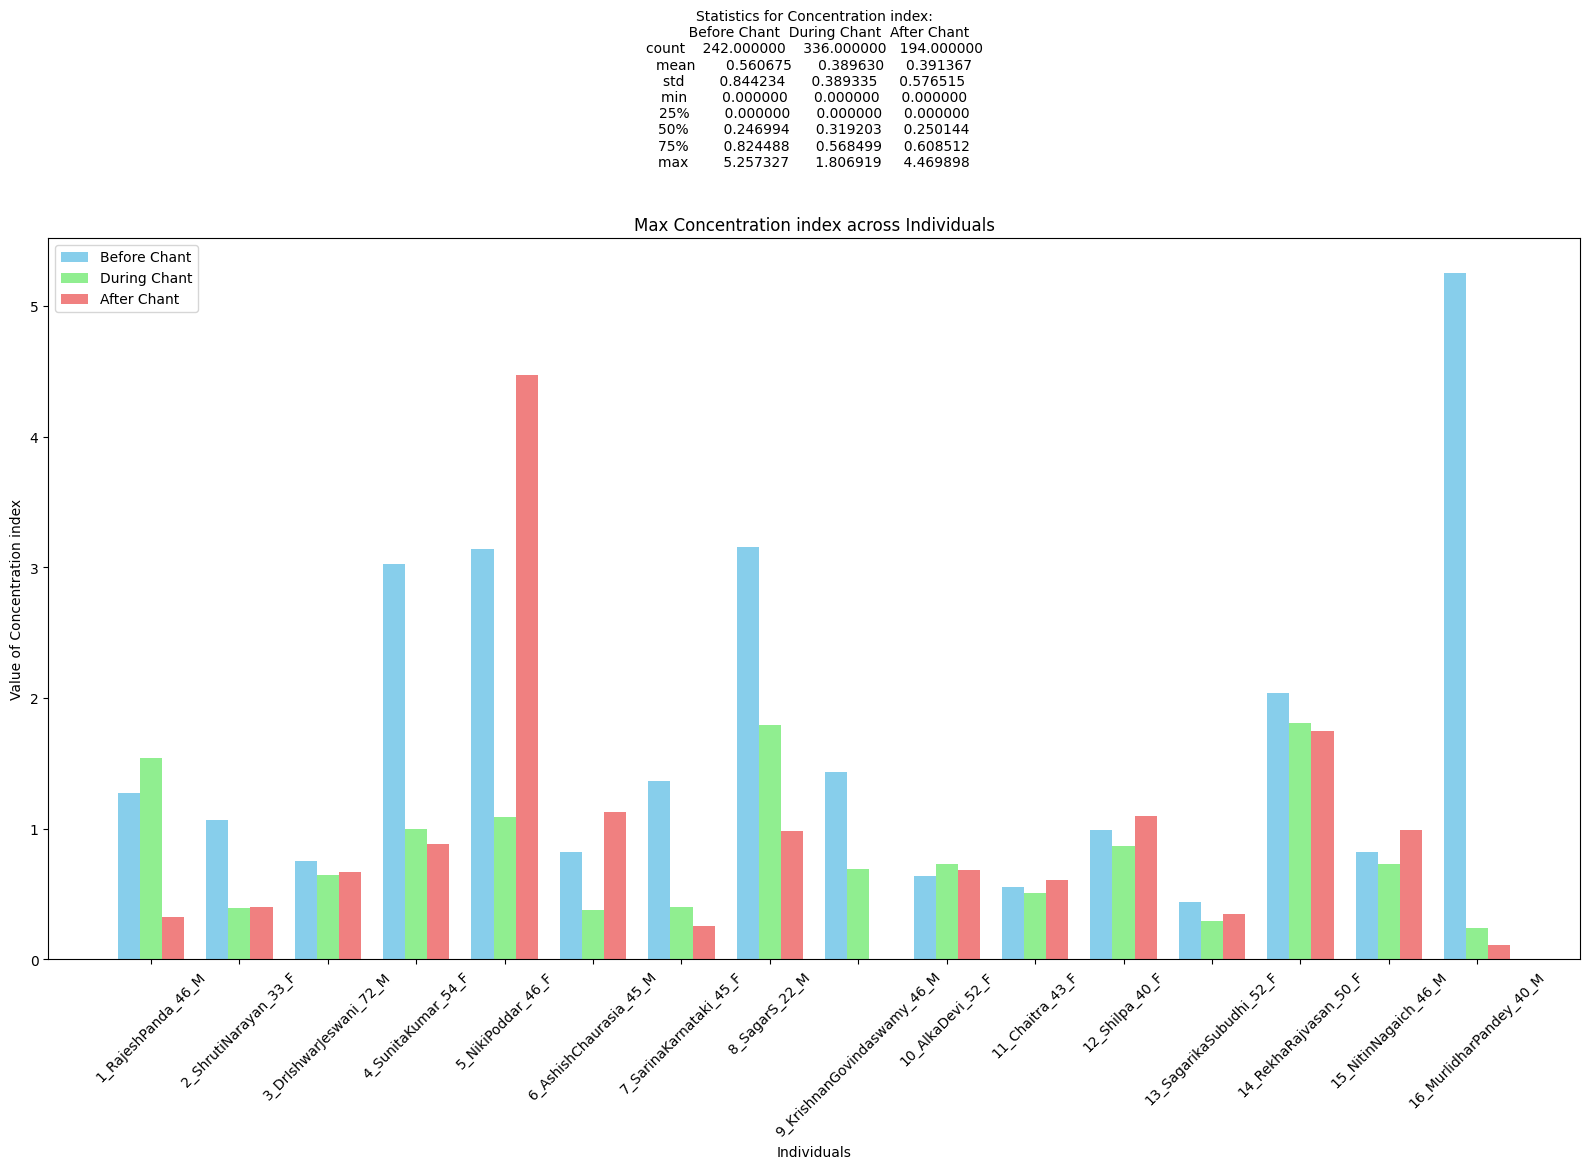

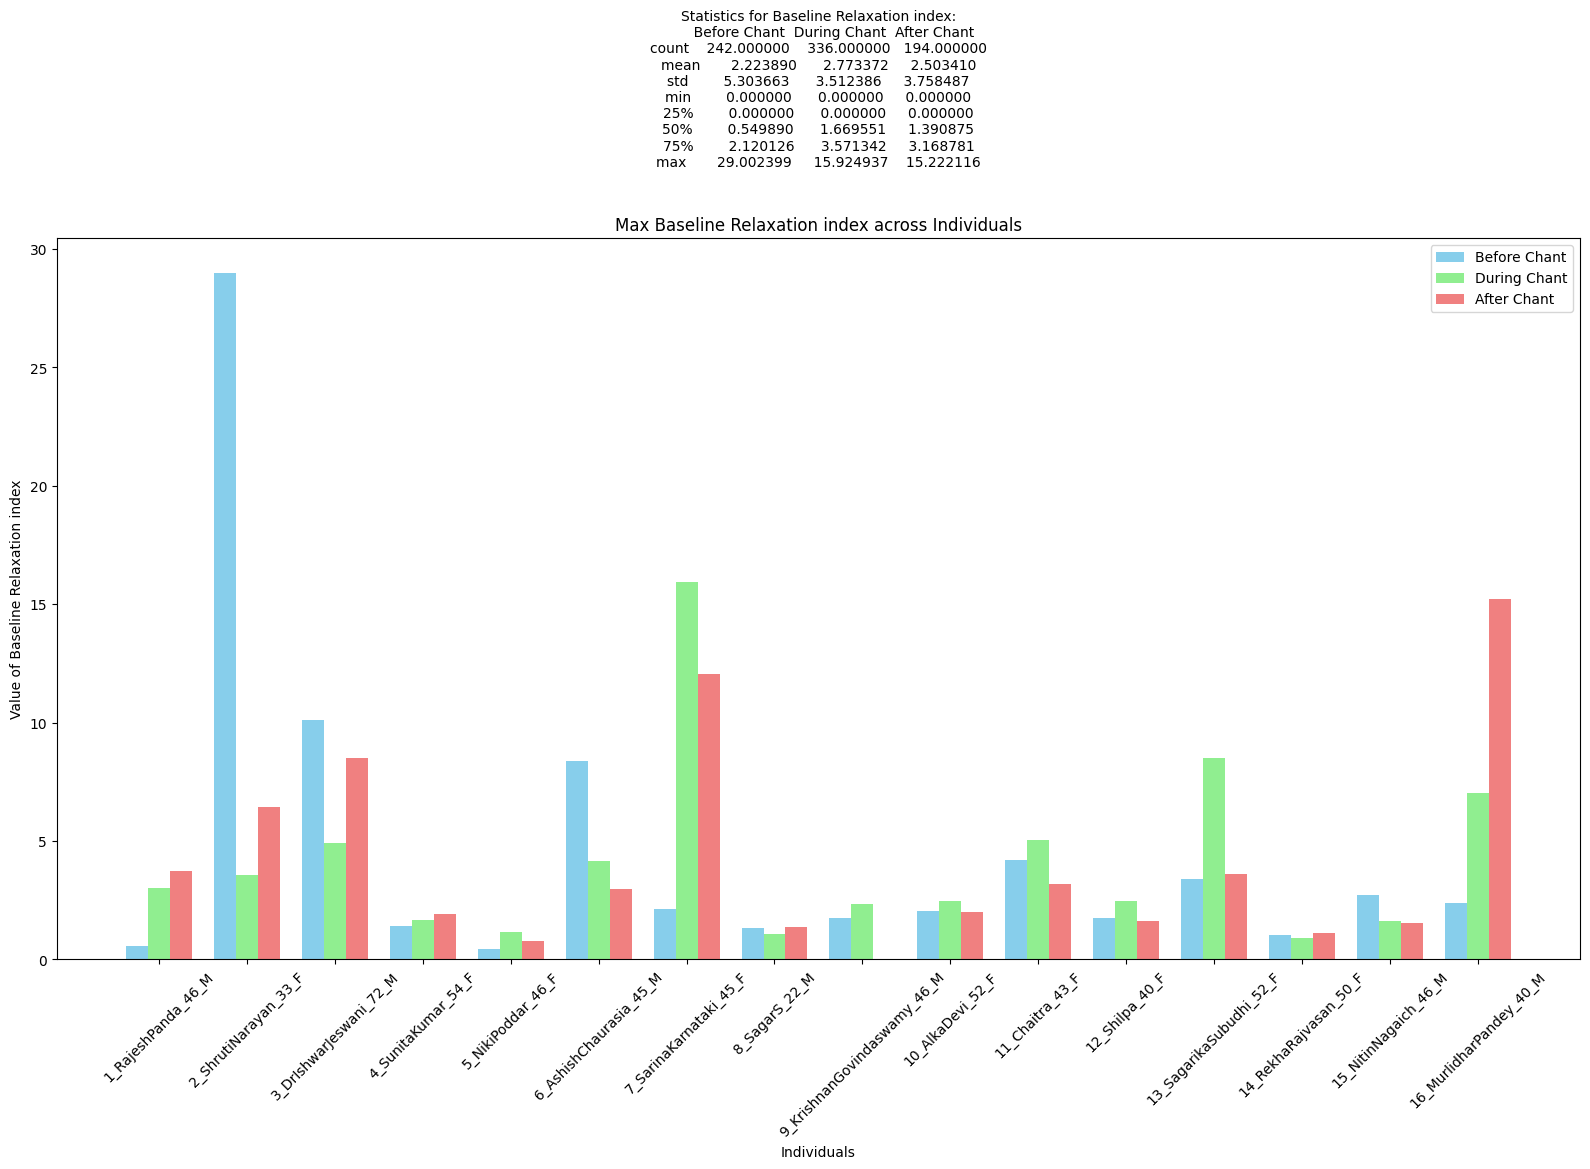

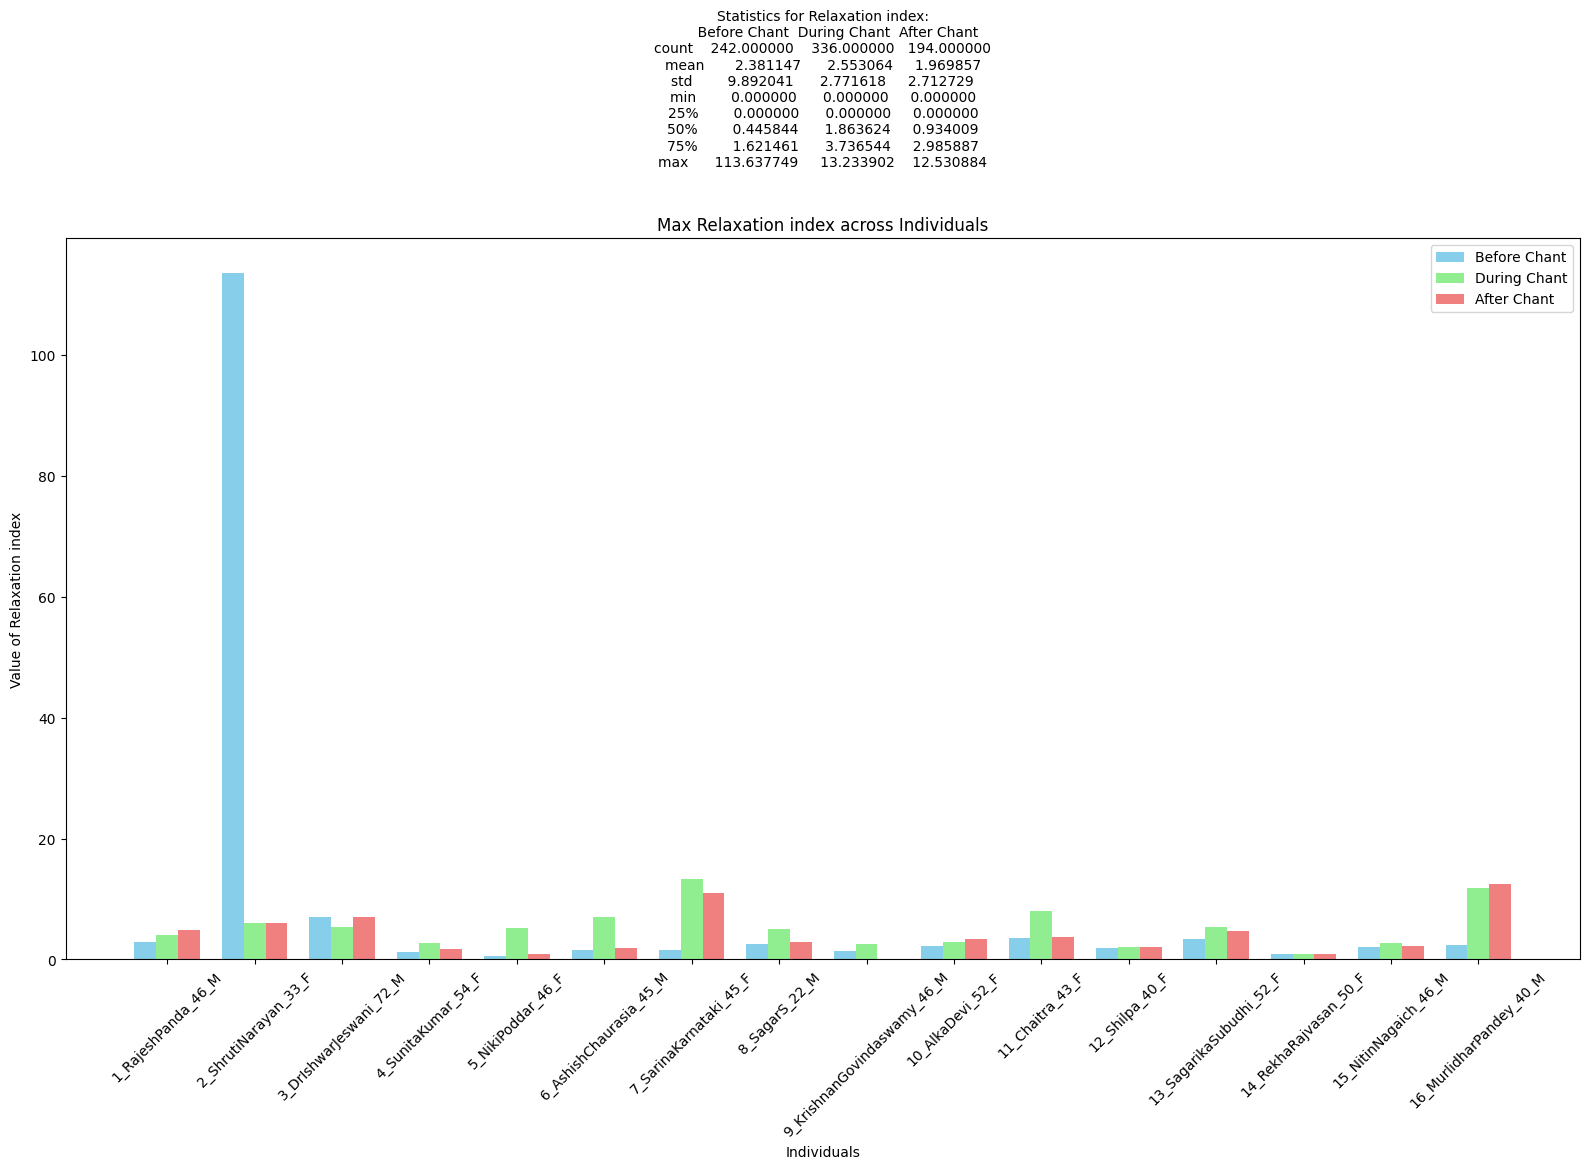

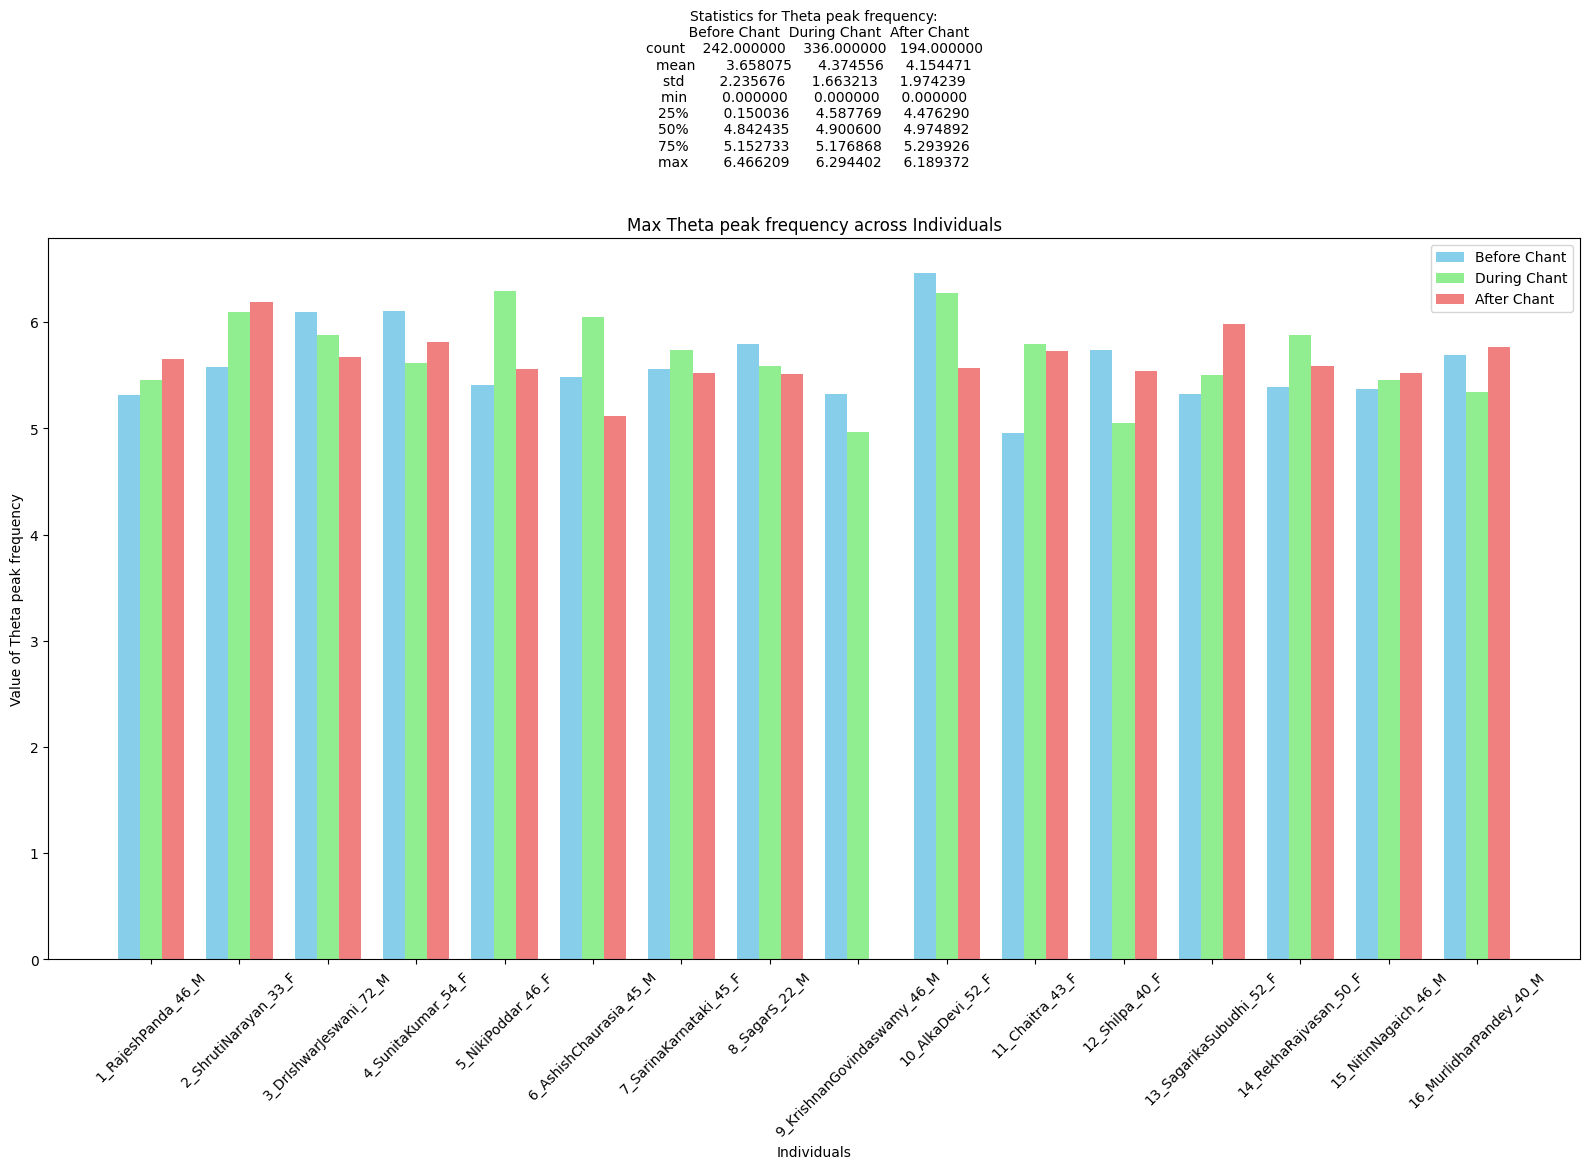

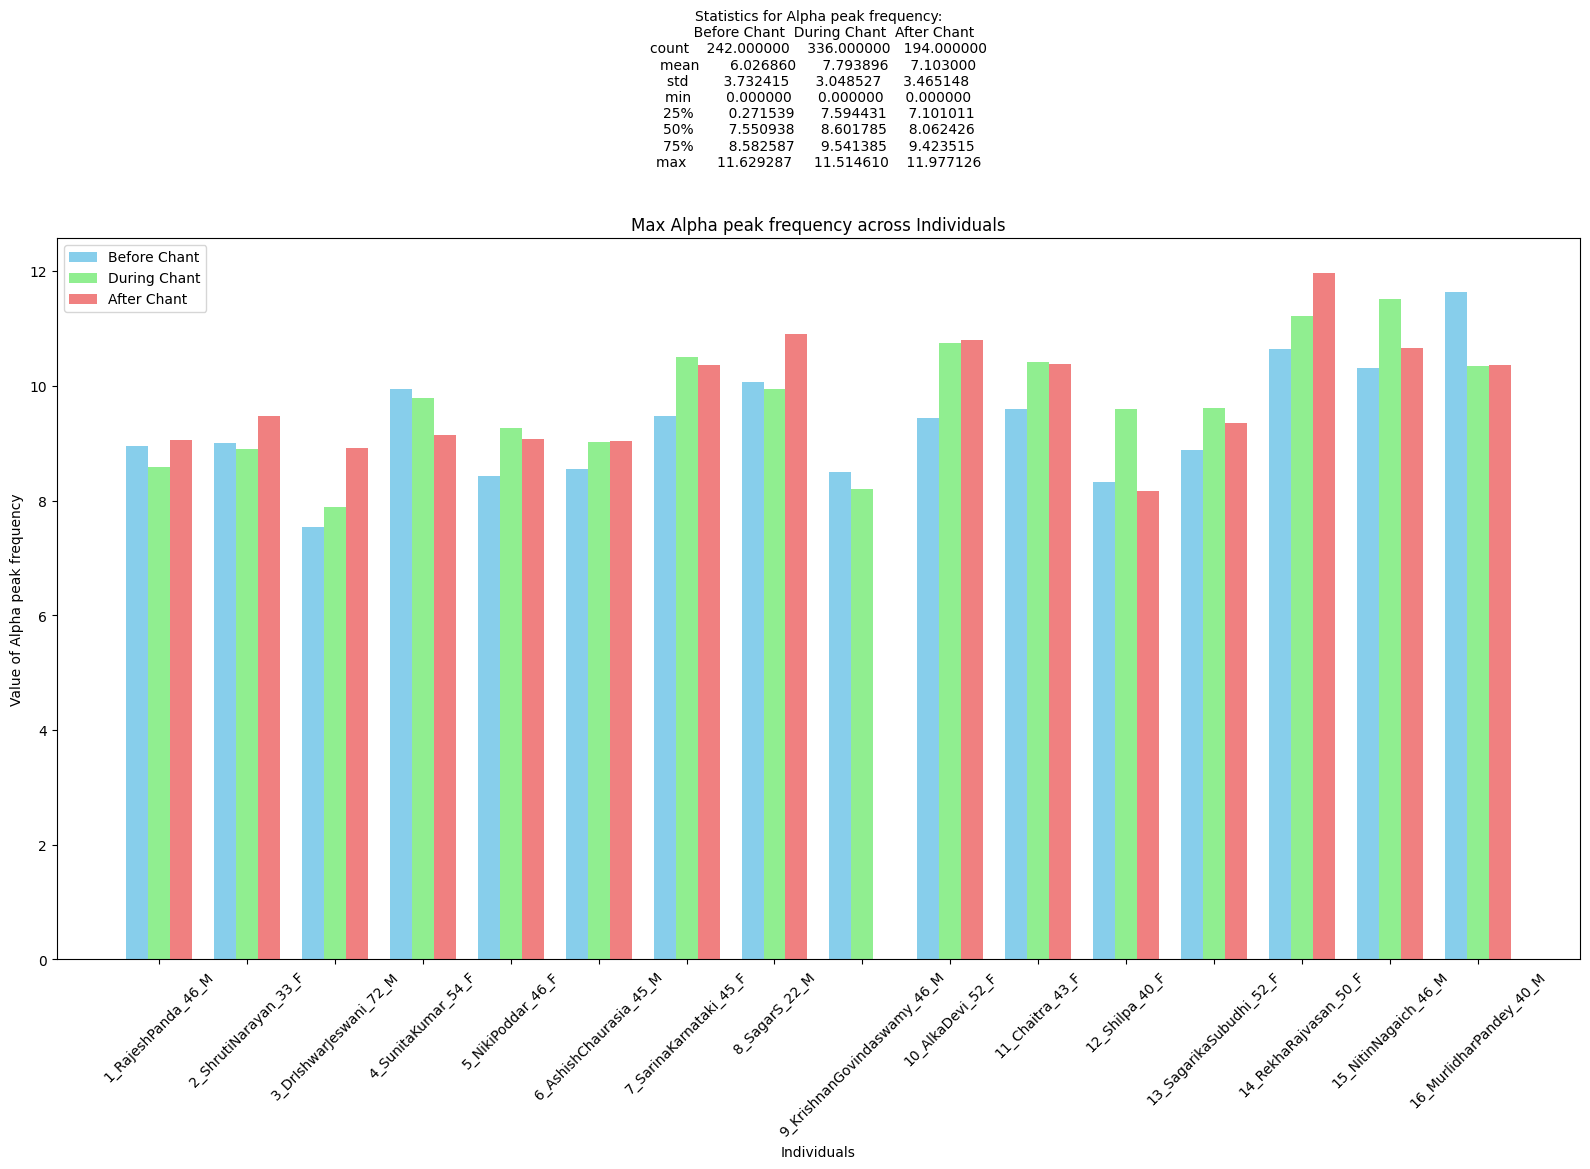

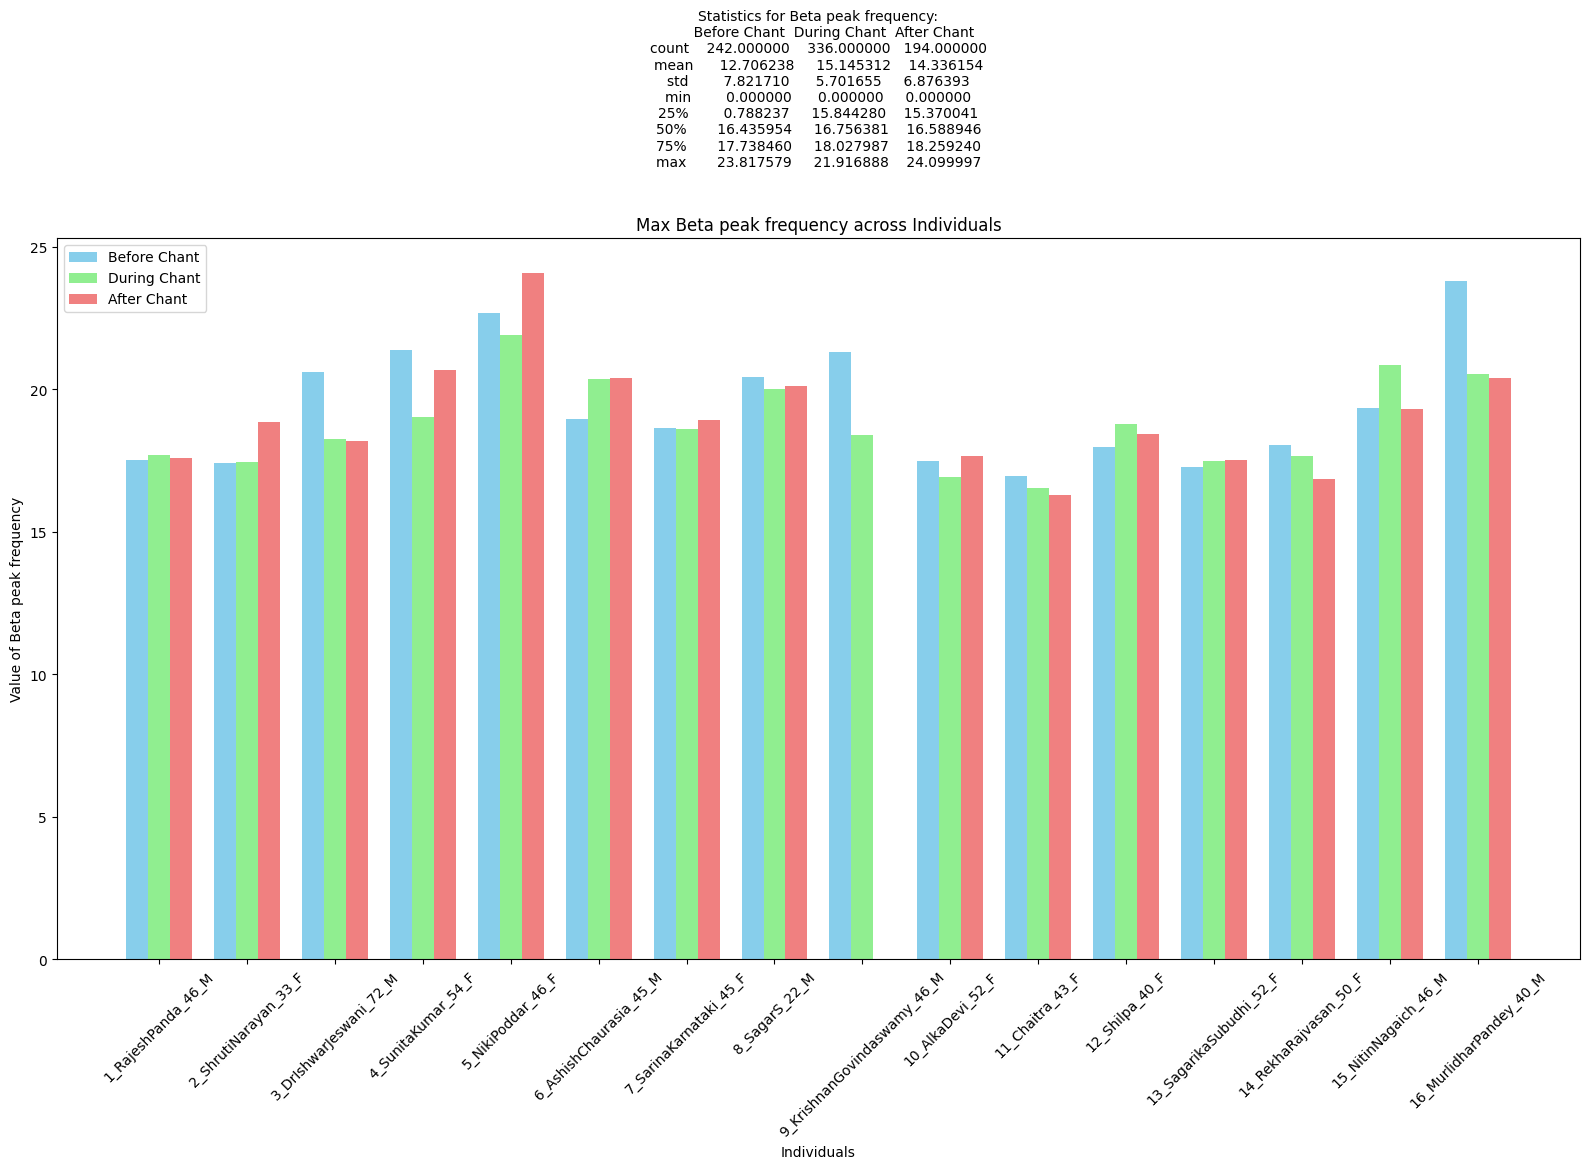

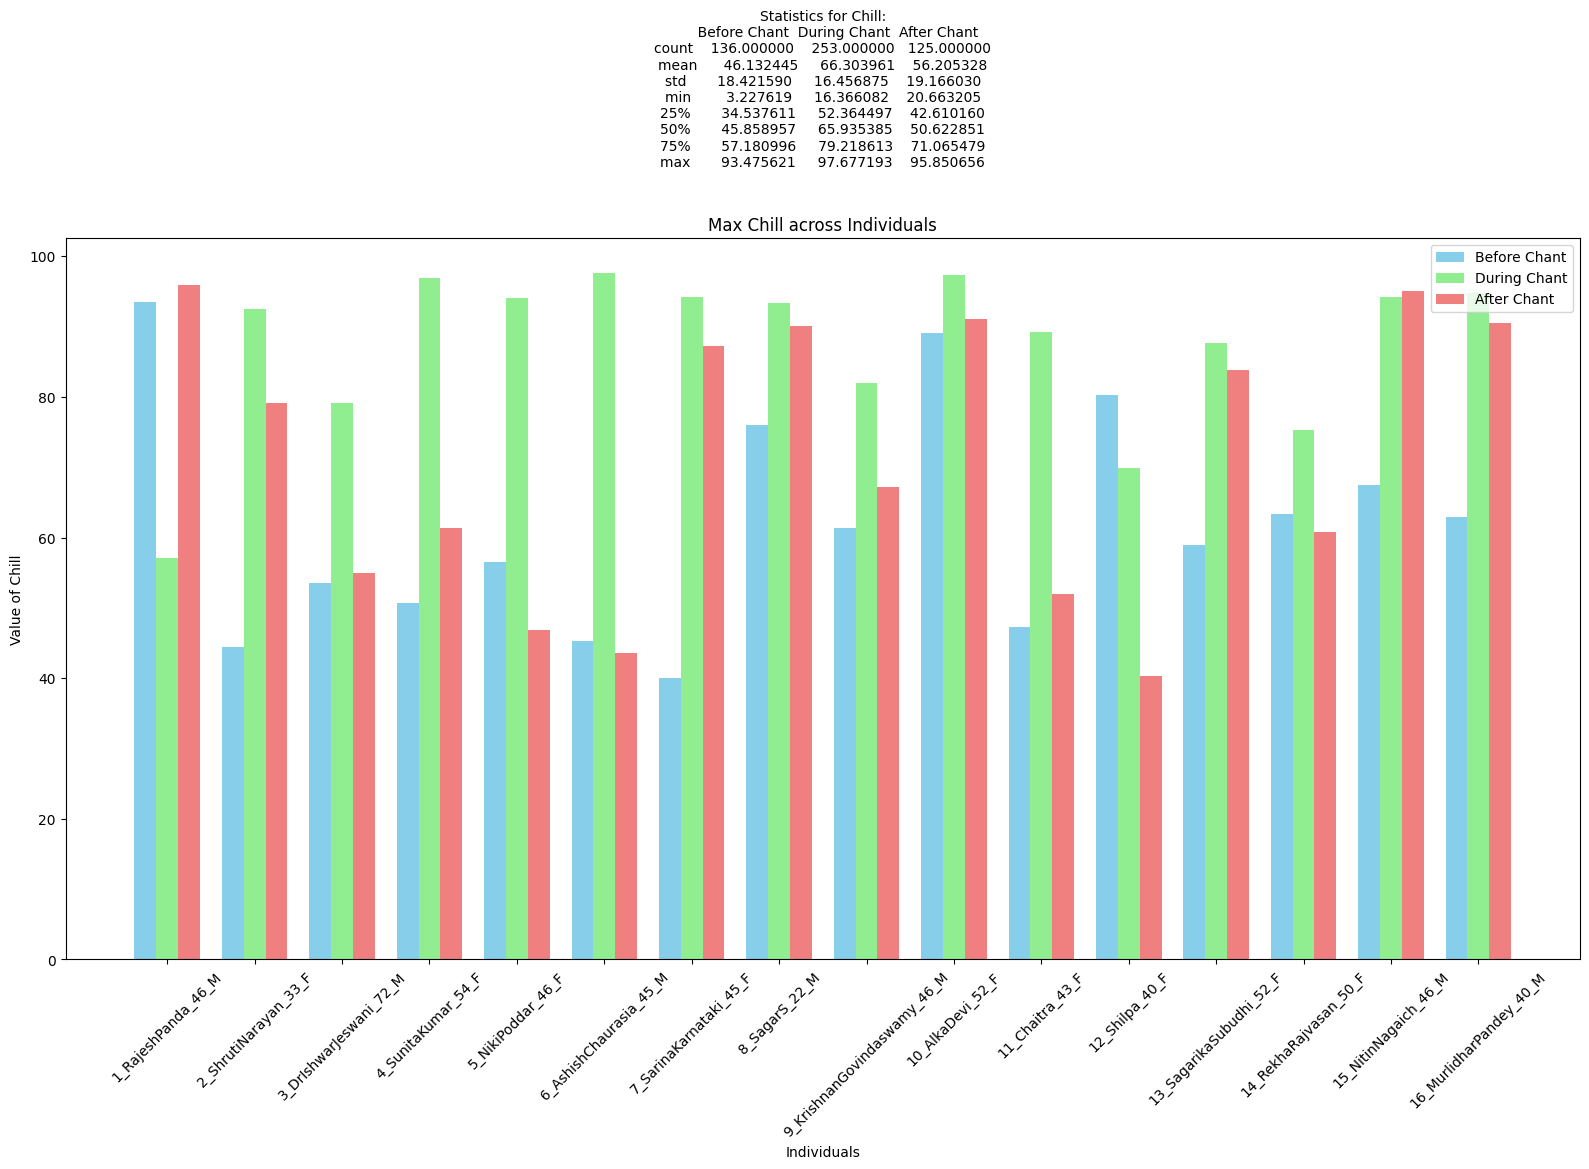

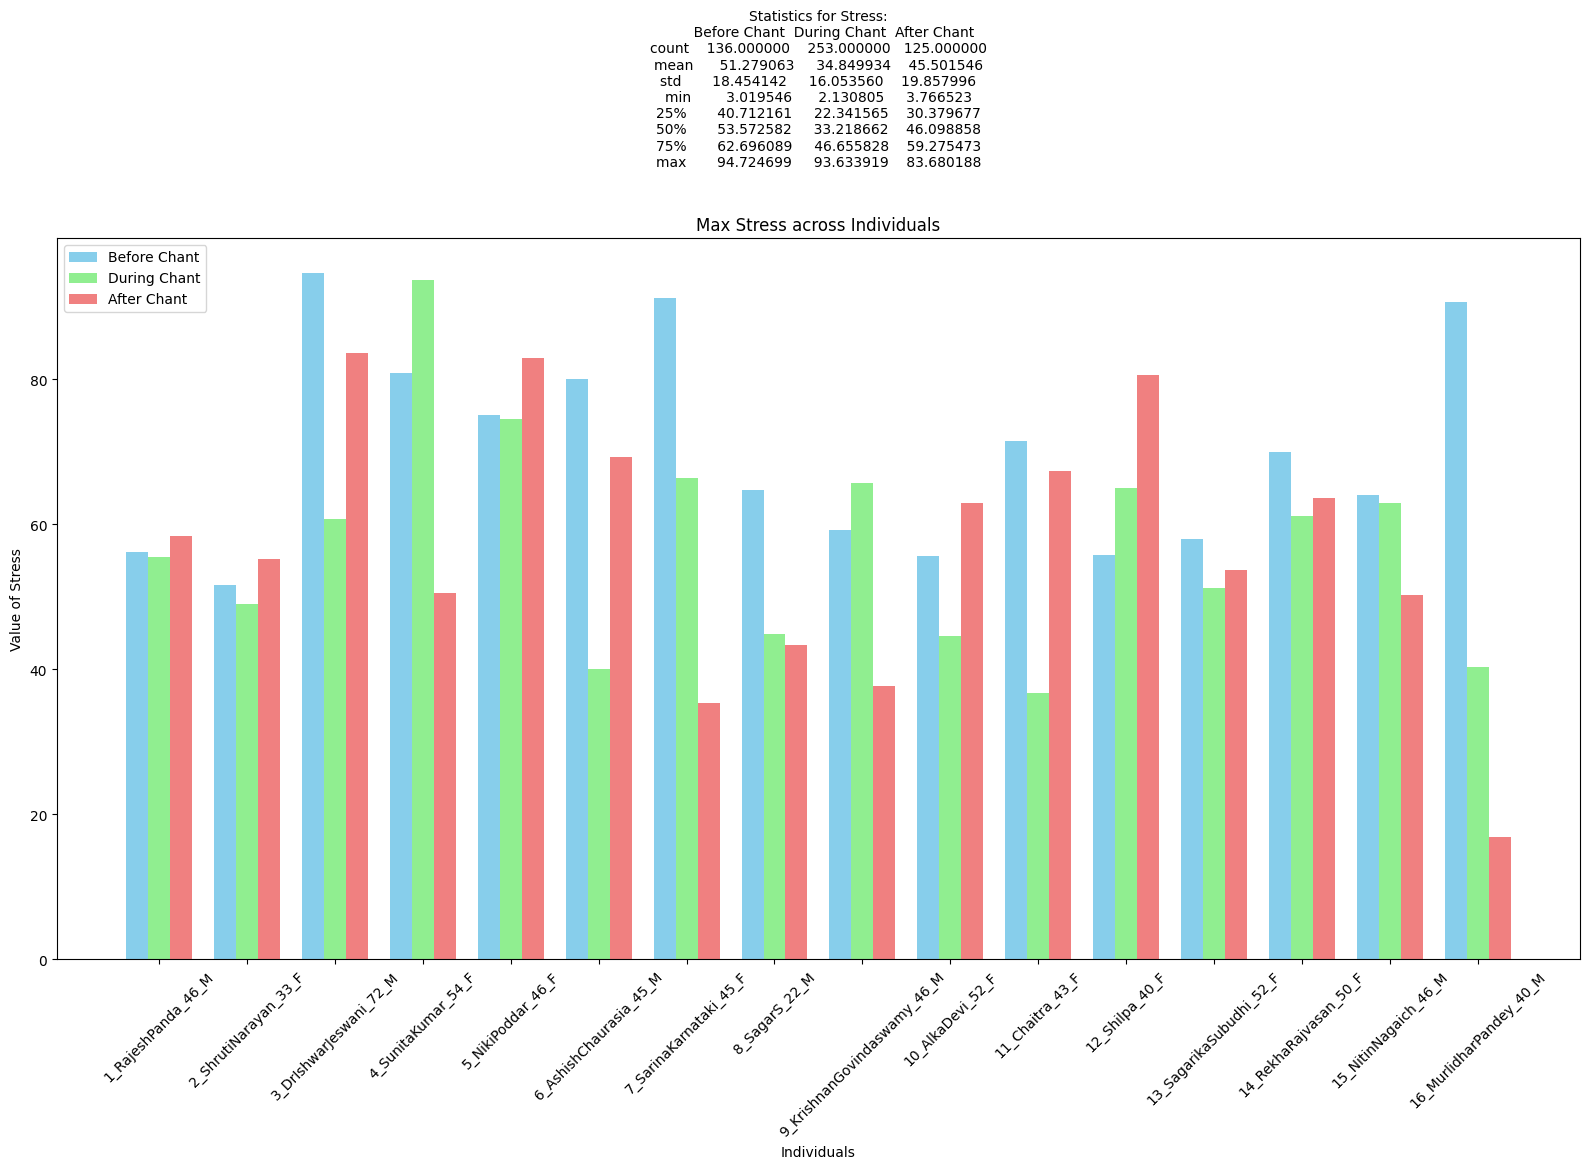

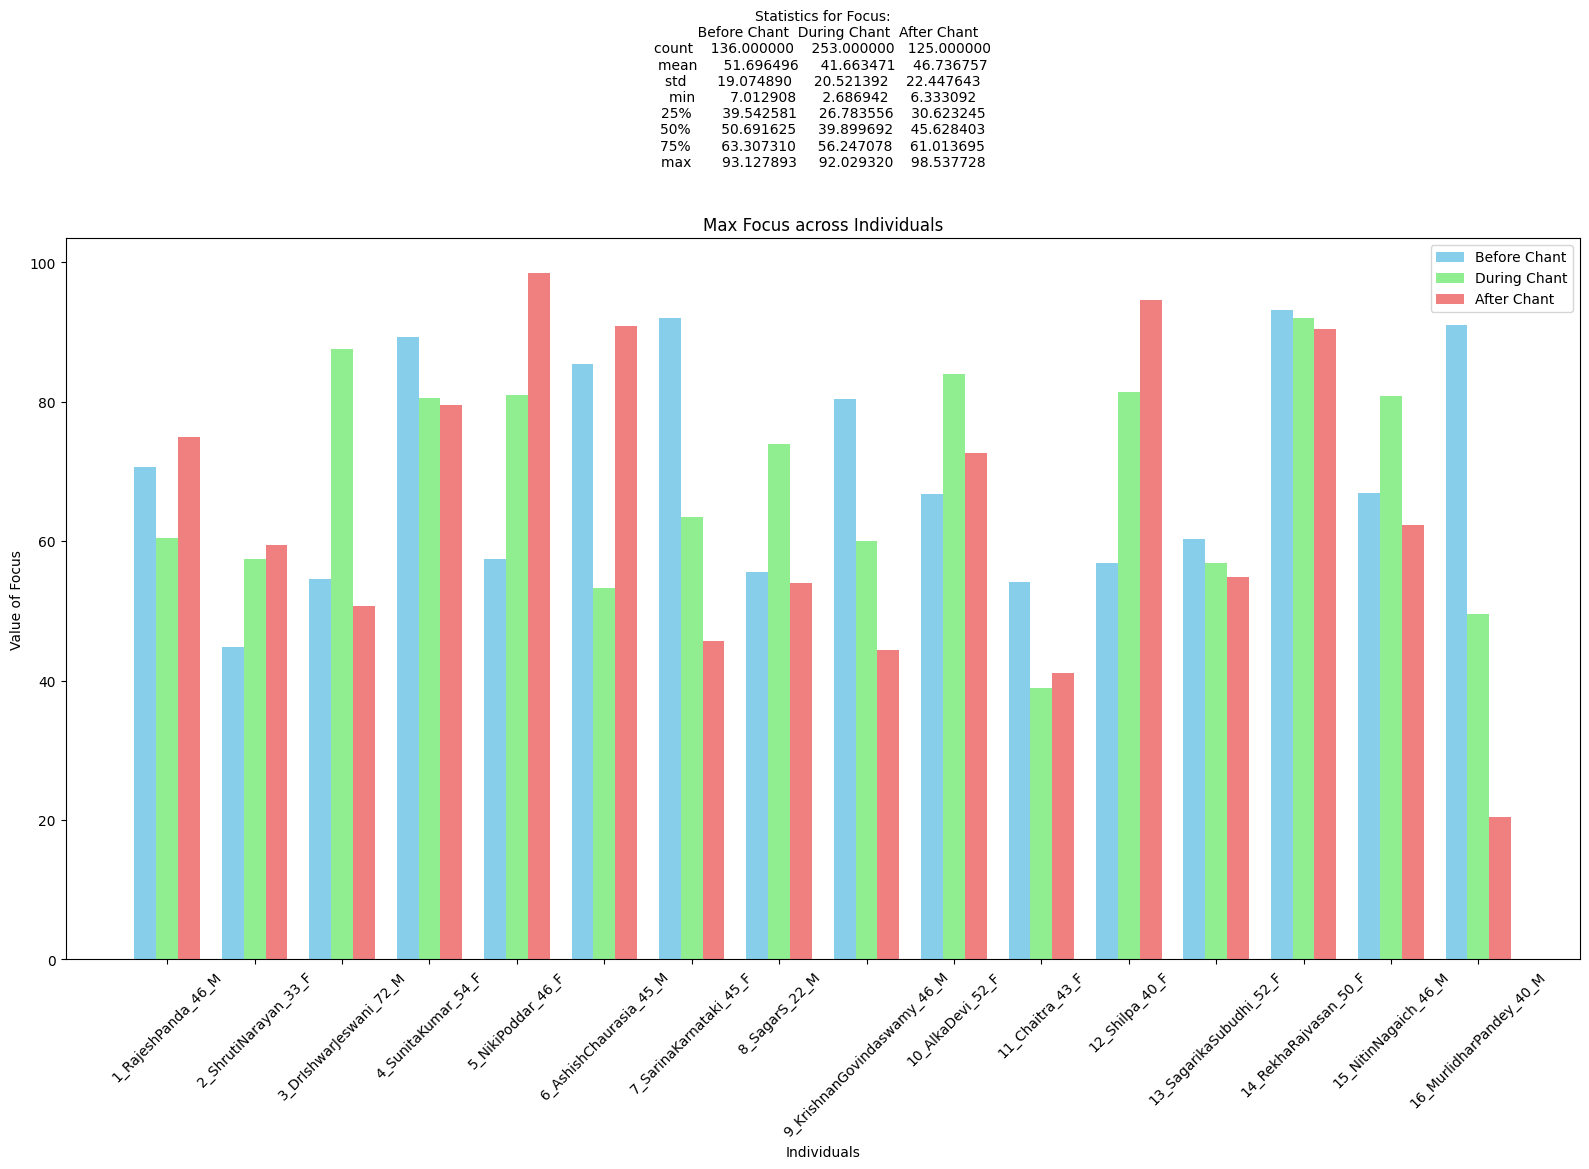

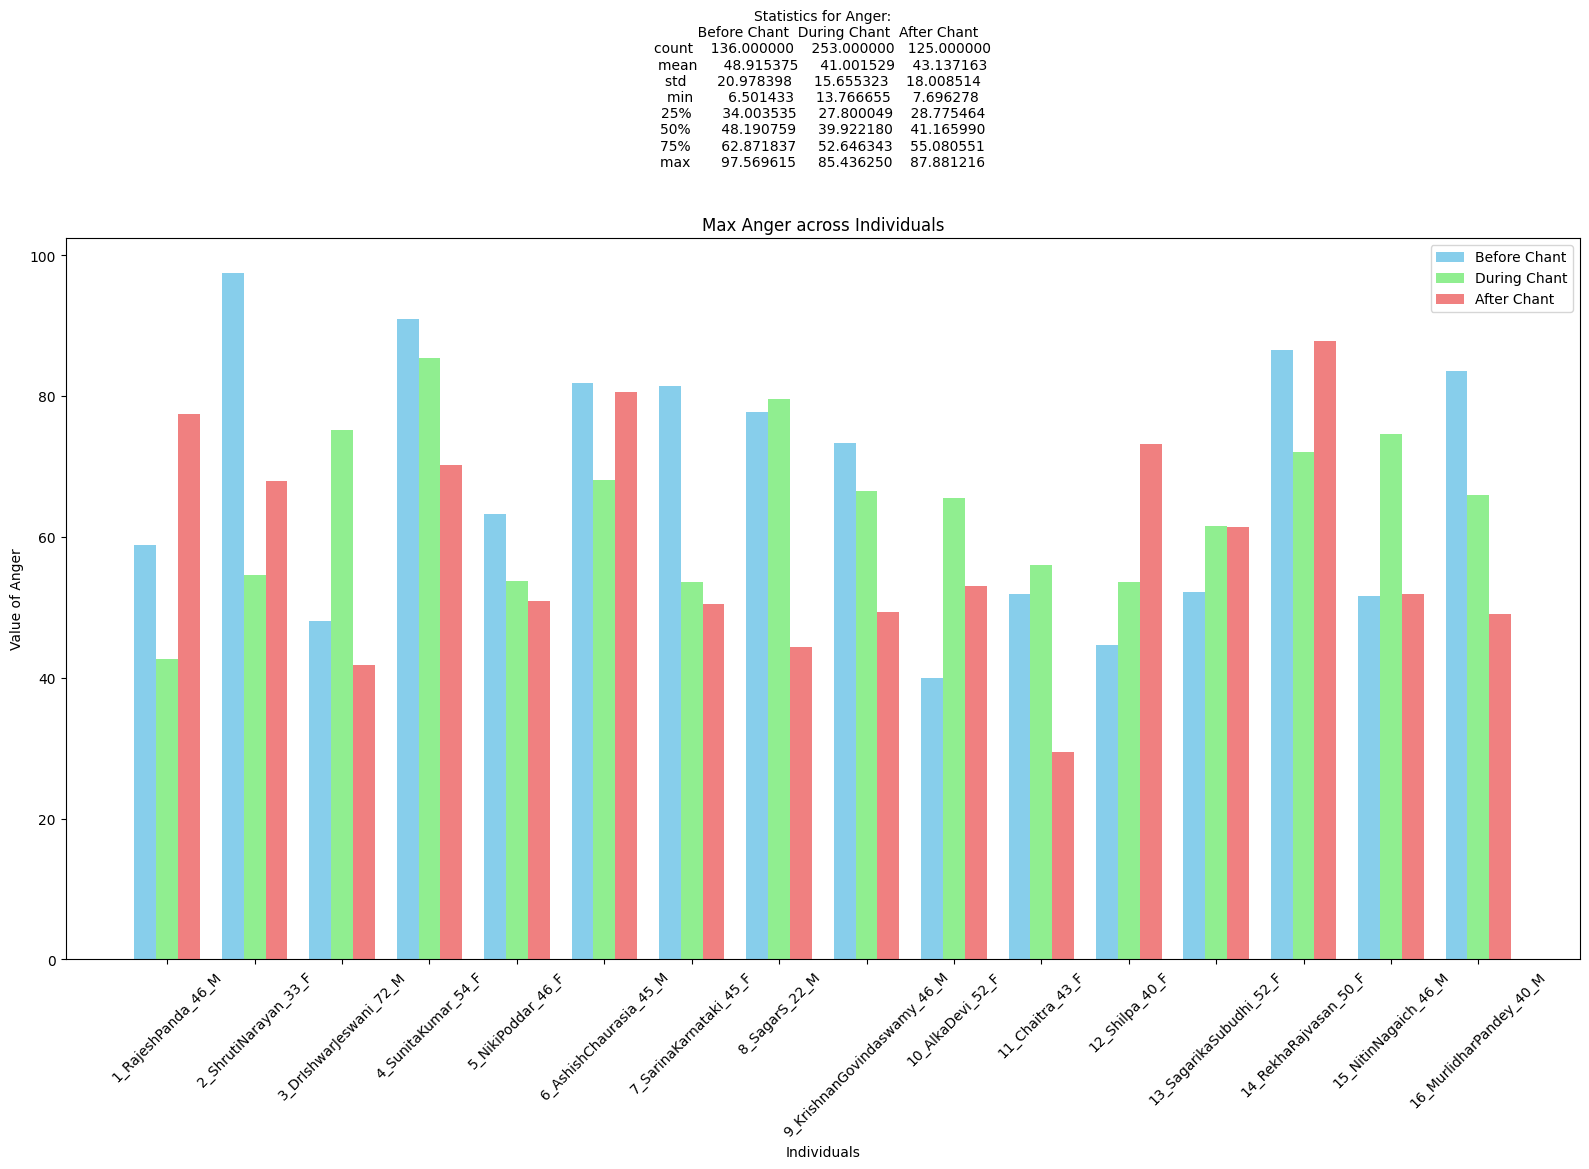

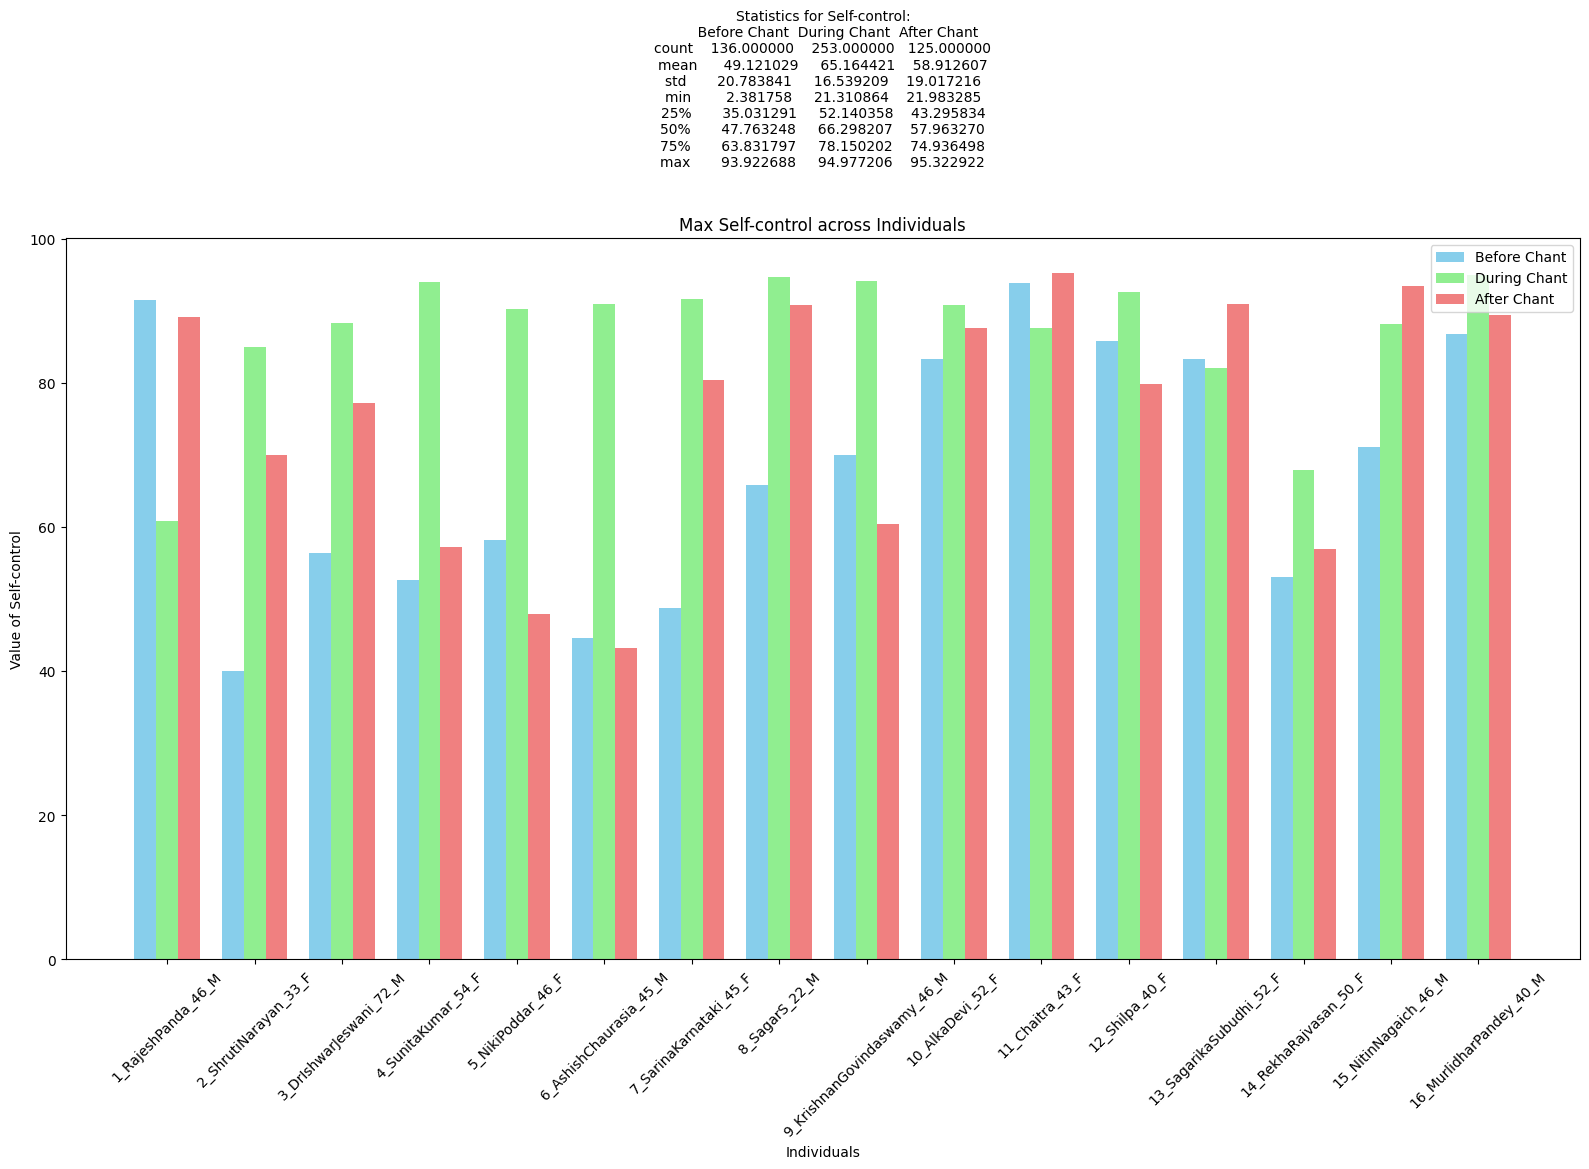

Plots saved to plots.pdf


In [7]:

import pandas as pd
import pdfkit

def compare_parameter_statistics(param_name, before_df, during_df, after_df):
    before_values = []
    during_values = []
    after_values = []
    
    # Collect parameter values for each period (before, during, after)
    for subject_before_df in before_df:
        before_values.extend(subject_before_df[param_name])
        
    for subject_during_df in during_df:
        during_values.extend(subject_during_df[param_name])
        
    for subject_after_df in after_df:
        after_values.extend(subject_after_df[param_name])

    # Calculate statistics for each period
    before_stats = pd.Series(before_values).describe()
    during_stats = pd.Series(during_values).describe()
    after_stats = pd.Series(after_values).describe()

    # Combine statistics into a single DataFrame
    comparison_df = pd.DataFrame({
        'Before Chant': before_stats,
        'During Chant': during_stats,
        'After Chant': after_stats
    })

    return comparison_df

pdf_filename = "plots.pdf"
pdf_pages = PdfPages(pdf_filename)
comparison_statistics_across_parameters = {}

for param_name in parameters_to_plot:
    comparison_statistics_across_parameters[param_name] = compare_parameter_statistics(param_name, before_chant_subject_dfs, during_chant_subject_dfs, after_chant_subject_dfs)
    statistics_df = comparison_statistics_across_parameters[param_name]  # Get statistics DataFrame for the parameter
    description = f"Statistics for {param_name}:\n{statistics_df.to_string()}"  # Create description
    fig = plot_subjects_vs_parameter(before_chant_subject_dfs, during_chant_subject_dfs, after_chant_subject_dfs, parameter_name=param_name, description=description)
    pdf_pages.savefig(fig)
    plt.close(fig)

# Close the PDF file
pdf_pages.close()

print(f"Plots saved to {pdf_filename}")

comparison_df = pd.concat(comparison_statistics_across_parameters, axis=1)
comparison_df.to_csv("comparison_data.csv")  # Save to CSV file


In [19]:
import pandas as pd

# Concatenate all dataframes for each period (before, during, after)
all_subjects_before = []
all_subjects_during = []
all_subjects_after = []

for subject in before_chant_subject_dfs:
    all_subjects_before.append(subject[parameters_to_plot].max(numeric_only=True))

for subject in during_chant_subject_dfs:
    all_subjects_during.append(subject[parameters_to_plot].max(numeric_only=True))
    
for subject in after_chant_subject_dfs:
    all_subjects_after.append(subject[parameters_to_plot].max(numeric_only=True))

# Calculate the mean or median value of each parameter for each period
before_mean = sum(all_subjects_before) / len(all_subjects_before)
during_mean = sum(all_subjects_during) / len(all_subjects_during)
after_mean = sum(all_subjects_after) / len(all_subjects_after)

# Calculate the percentage change between mean values for different periods
percentage_change_during_before = ((during_mean - before_mean) / before_mean) * 100
percentage_change_after_during = ((after_mean - during_mean) / during_mean) * 100
percentage_change_after_before = ((after_mean - before_mean) / during_mean) * 100

# You can also calculate the median instead of mean if needed
# before_median = all_subjects_before.median()
# during_median = all_subjects_during.median()
# after_median = all_subjects_after.median()

print("Percentage change from before to during chant:")
print(percentage_change_during_before)

print("\nPercentage change from during to after chant:")
print(percentage_change_after_during)

print("\nPercentage change from after to before chant:")
print(percentage_change_after_before)

Percentage change from before to during chant:
IAPF                             0.191815
Baseline Fatigue score         -20.960073
Fatigue score                  -99.279727
Baseline Alpha Gravity          -0.824591
Alpha Gravity                  -34.725228
Baseline Concentration index   -41.644854
Concentration index            -51.052977
Baseline Relaxation index       -9.323526
Relaxation index               -42.517448
Theta peak frequency             1.549937
Alpha peak frequency             4.201473
Beta peak frequency             -3.004202
Chill                           40.830200
Stress                         -18.494580
Focus                           -1.627203
Anger                           -5.032506
Self-control                    28.477028
dtype: float64

Percentage change from during to after chant:
IAPF                             -0.446712
Baseline Fatigue score            3.854702
Fatigue score                   -12.654503
Baseline Alpha Gravity          244.204156
Alpha

In [20]:
import pandas as pd

# Concatenate all dataframes for each period (before, during, after)
all_subjects_before = []
all_subjects_during = []
all_subjects_after = []

for subject in before_chant_subject_dfs:
    all_subjects_before.append(subject[parameters_to_plot].max(numeric_only=True))

for subject in during_chant_subject_dfs:
    all_subjects_during.append(subject[parameters_to_plot].max(numeric_only=True))
    
for subject in after_chant_subject_dfs:
    all_subjects_after.append(subject[parameters_to_plot].max(numeric_only=True))

# Calculate the mean or median value of each parameter for each period
before_mean = sum(all_subjects_before) / len(all_subjects_before)
during_mean = sum(all_subjects_during) / len(all_subjects_during)
after_mean = sum(all_subjects_after) / len(all_subjects_after)

# Calculate the percentage change between mean values for different periods
percentage_change_during_before = ((during_mean - before_mean) / before_mean) * 100
percentage_change_after_during = ((after_mean - during_mean) / during_mean) * 100
percentage_change_after_before = ((after_mean - before_mean) / during_mean) * 100

# Determine whether the parameter values increased or decreased
increase_decrease_before = ["Increased" if change > 0 else "Decreased" for change in percentage_change_during_before]
increase_decrease_after = ["Increased" if change > 0 else "Decreased" for change in percentage_change_after_during]
increase_decrease_after_before = ["Increased" if change > 0 else "Decreased" for change in percentage_change_after_before]

# Create a DataFrame to organize the information
data = {
    "Parameter": parameters_to_plot,
    "Percentage Change from Before to During Chant": percentage_change_during_before,
    "Increase/Decrease (Before to During Chant)": increase_decrease_before,
    "Percentage Change from During to After Chant": percentage_change_after_during,
    "Increase/Decrease (During to After Chant)": increase_decrease_after,
    "Percentage Change from After to Before Chant": percentage_change_after_before,
    "Increase/Decrease (After to Before Chant)": increase_decrease_after_before
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("parameter_change_statistics.csv", index=False)

print("CSV file saved successfully.")


CSV file saved successfully.
